In [2]:
# Import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time 
%config InlineBackend.figure_format = 'retina'
sns.set(rc={'figure.figsize':(20,14)})

In [3]:
# Reading features list
with open("../input/kdd-cup-1999-data/kddcup.names", 'r') as f:
    print(f.read())

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [4]:
# Append columns to the dataset and add ‘target’ column.
cols ="""duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins, 
logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,
is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,
srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate"""

columns =[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())
  
columns.append('target')
print(len(columns))

42


In [5]:
# Read the 'training_attack_types' file
with open("../input/kdd-cup-1999-data/training_attack_types", 'r') as f:
    print(f.read())

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




In [6]:
# Create dictionary of training_attack_types 

attacks_types = {
    'normal': 'normal',
    'back': 'dos',
    'buffer_overflow': 'u2r',
    'ftp_write': 'r2l',
    'guess_passwd': 'r2l',
    'imap': 'r2l',
    'ipsweep': 'probe',
    'land': 'dos',
    'loadmodule': 'u2r',
    'multihop': 'r2l',
    'neptune': 'dos',
    'nmap': 'probe',
    'perl': 'u2r',
    'phf': 'r2l',
    'pod': 'dos',
    'portsweep': 'probe',
    'rootkit': 'u2r',
    'satan': 'probe',
    'smurf': 'dos',
    'spy': 'r2l',
    'teardrop': 'dos',
    'warezclient': 'r2l',
    'warezmaster': 'r2l',
}

In [7]:
# Read in the full KDD 1999 dataset (10% subset also available)
path = "../input/kdd-cup-1999-data/kddcup.data_10_percent.gz"
kdd_df = pd.read_csv(path, names = columns)

In [8]:
# Add Attack Type column to DataFrame
kdd_df['Attack_Type'] = kdd_df.target.apply(lambda r:attacks_types[r[:-1]])
kdd_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack_Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [9]:
# Datframe info, ~4.9 million entries 
kdd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

In [10]:
# Check missing for missing entries
kdd_df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

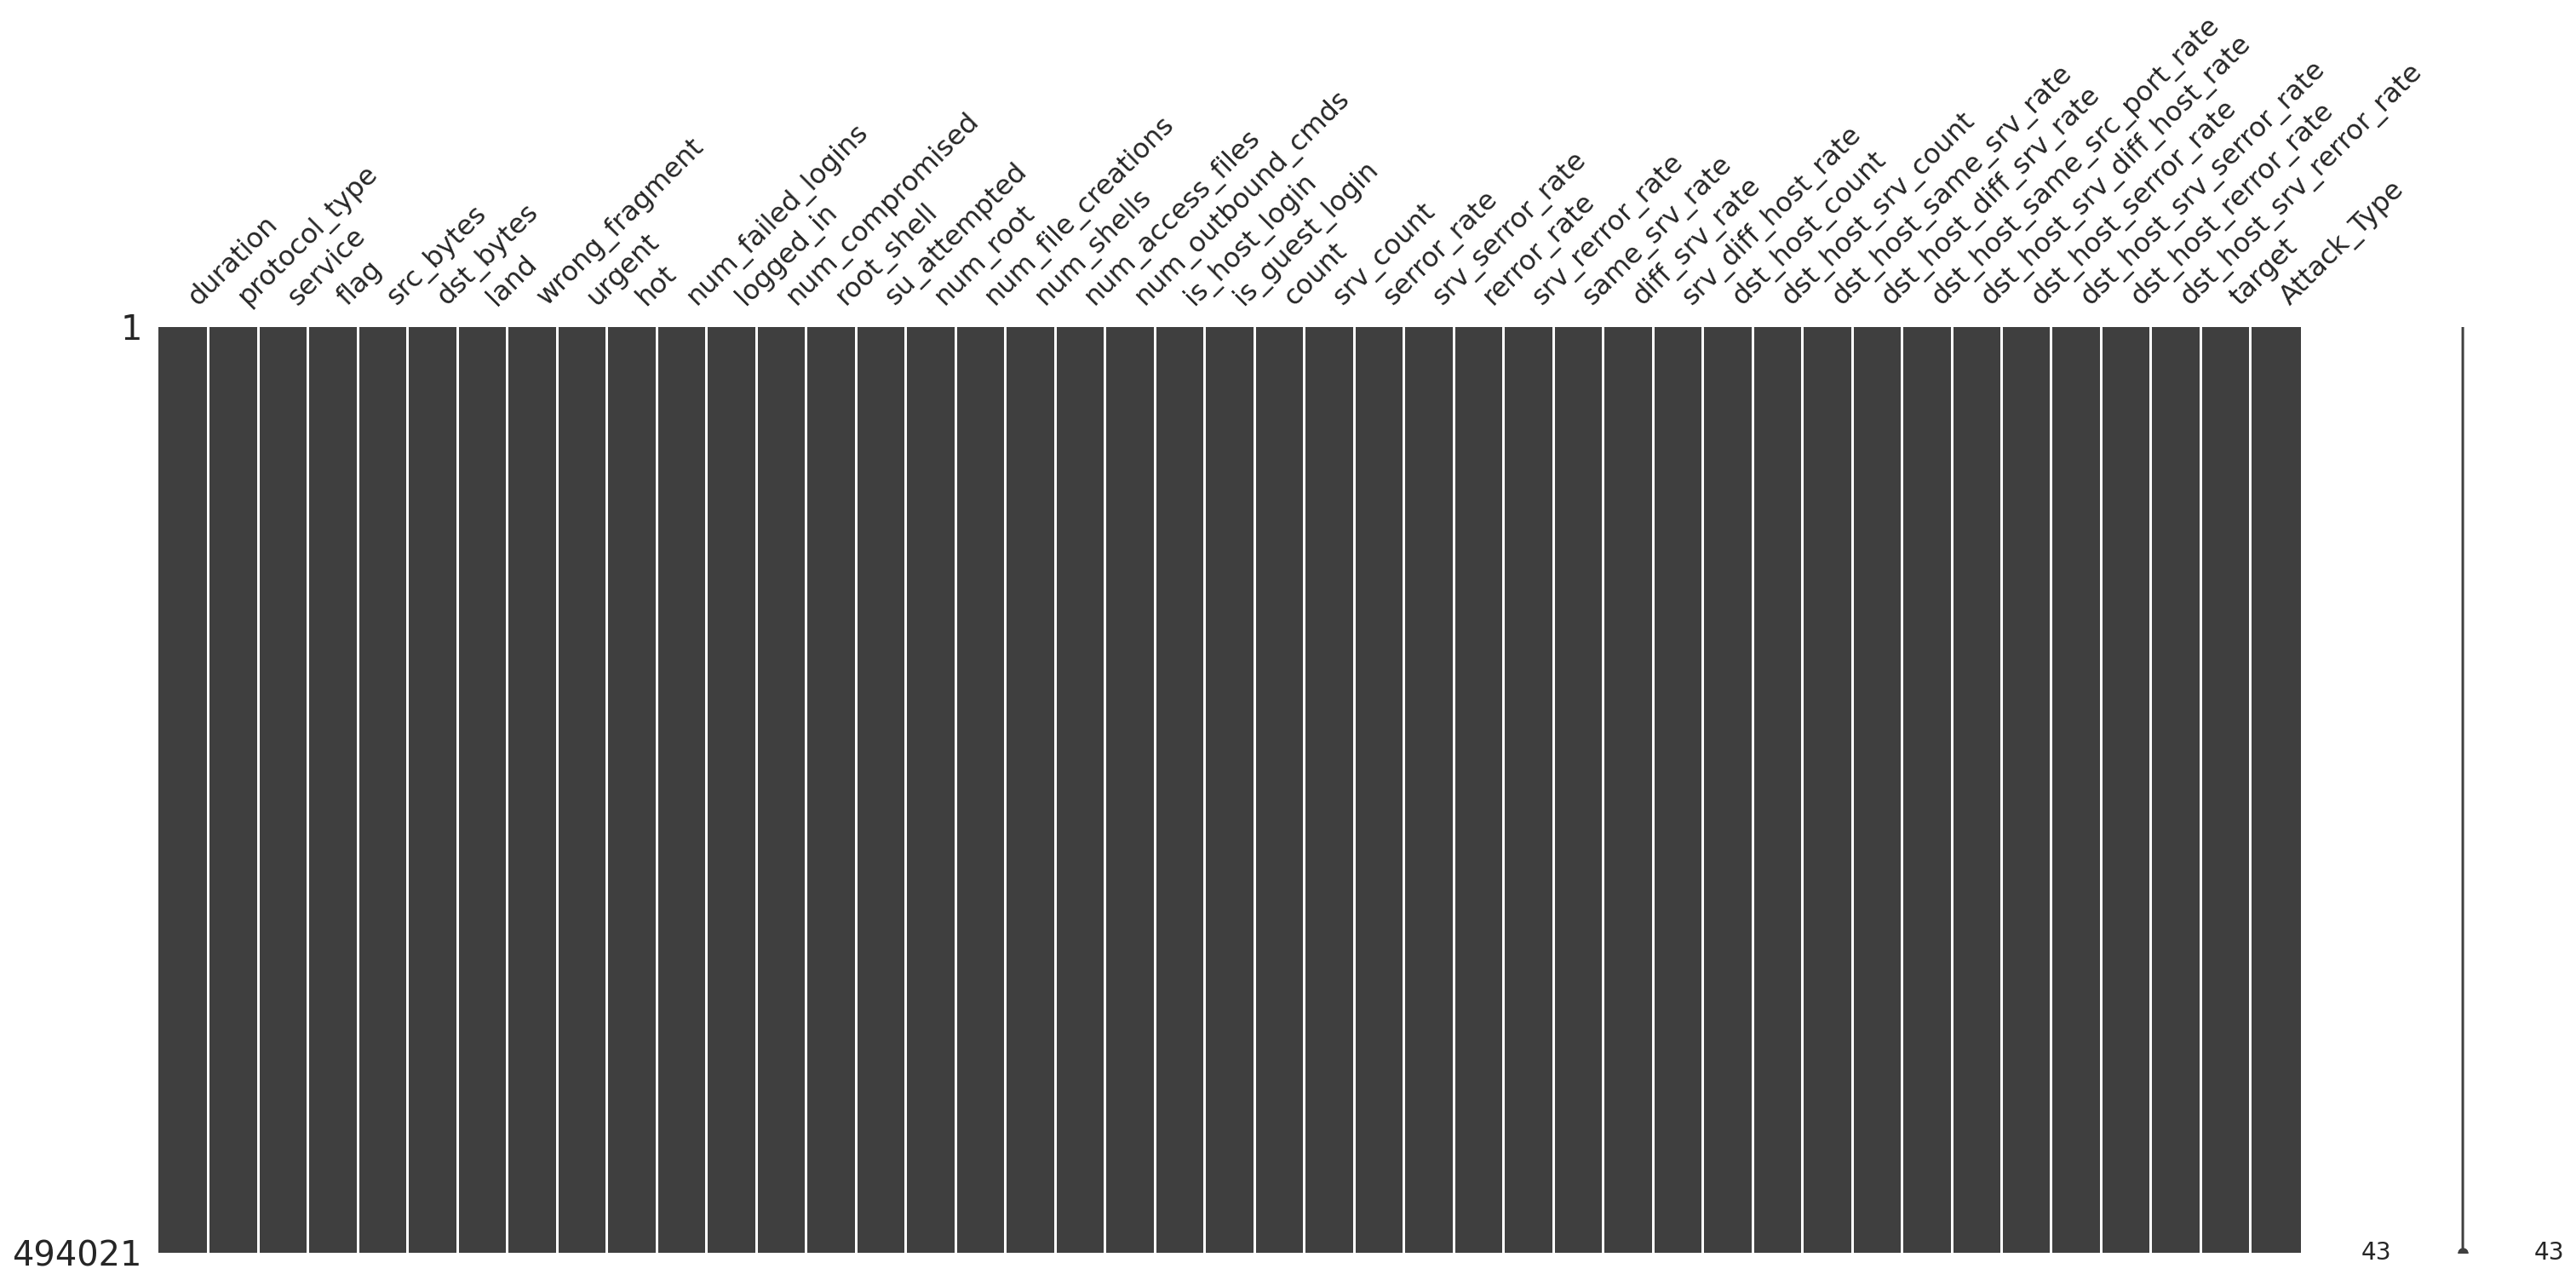

In [11]:
# Visualizing missing entries (none found)
import missingno as msno
msno.matrix(kdd_df)
plt.show()

In [12]:
kdd_df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack_Type'],
      dtype='object')

In [13]:
kdd_df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
# Finding categorical features
numerical_cols = kdd_df._get_numeric_data().columns
  
categorical_cols = list(set(kdd_df.columns)-set(numerical_cols))
categorical_cols.remove('target')
categorical_cols.remove('Attack_Type')
  
categorical_cols

['service', 'flag', 'protocol_type']

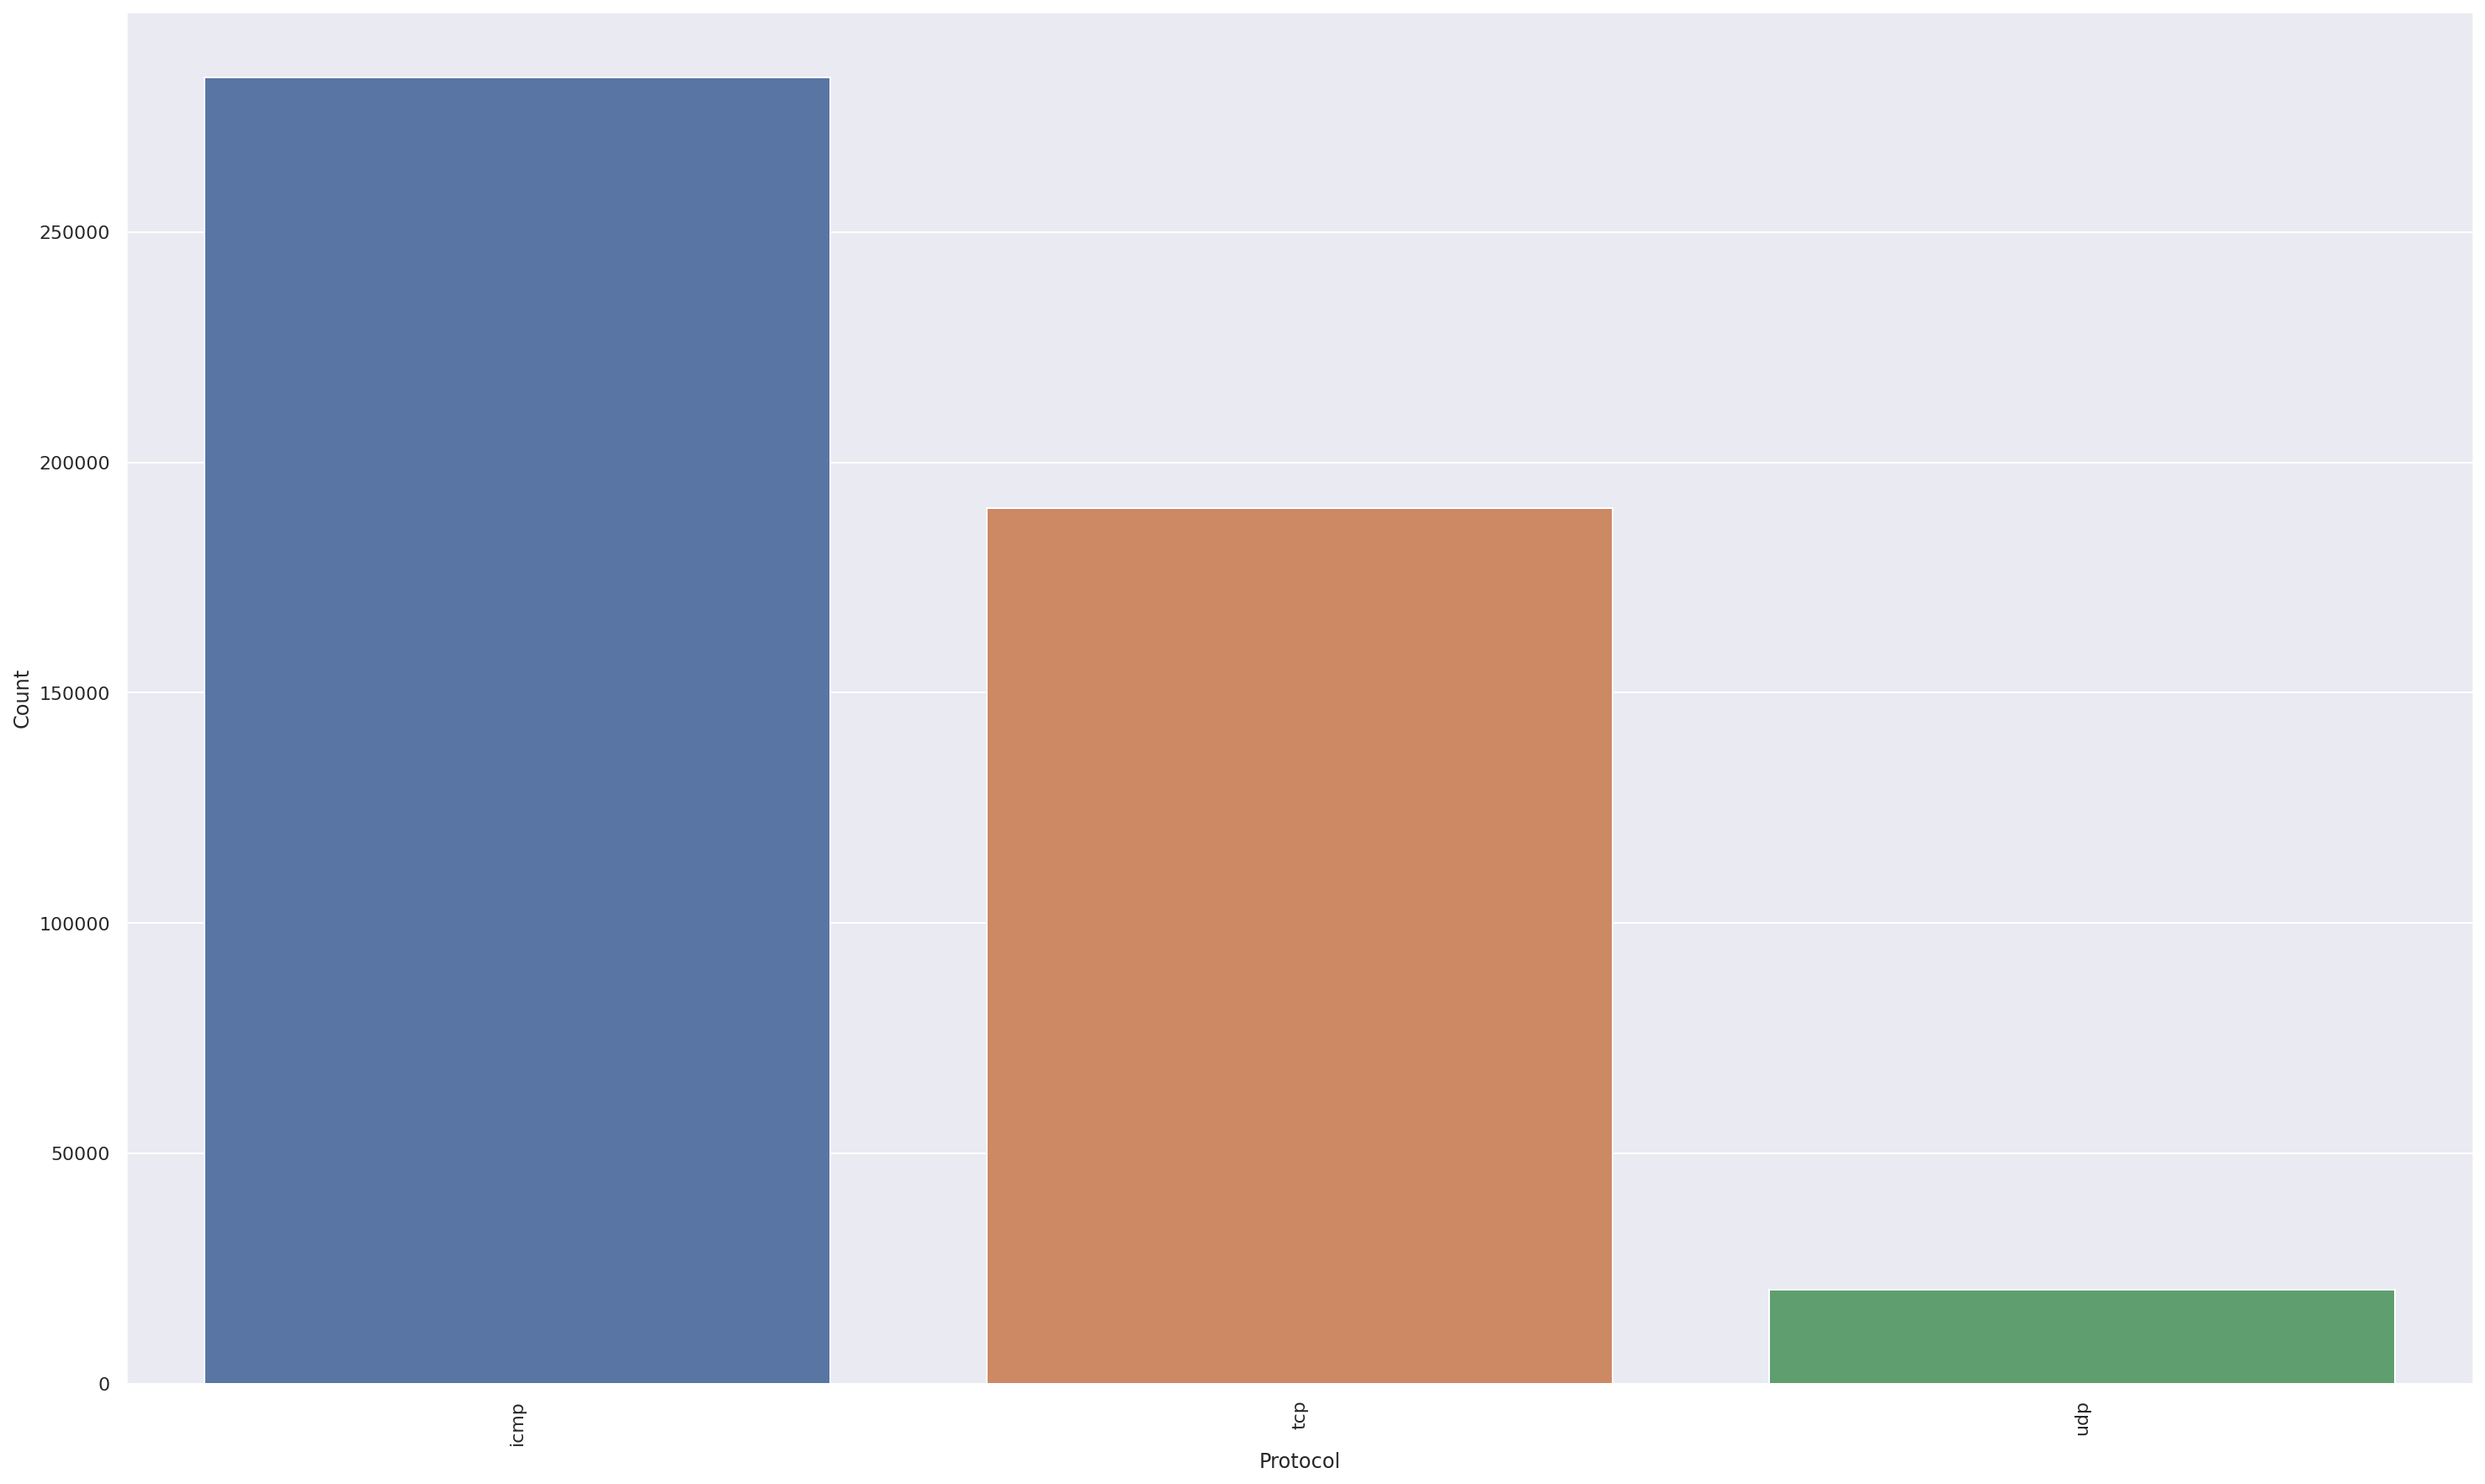

In [15]:
df2 = pd.DataFrame(columns = ['Protocol'])
df2['Protocol']=[each for each in kdd_df.protocol_type.unique()]
df2['Count']=[len(kdd_df[kdd_df.protocol_type==each]) for each in df2.Protocol]
df2=df2.sort_values(by=['Count'],ascending=False)

plt.figure(figsize=(25,15))
sns.barplot(x=df2.Protocol.head(50), y=df2.Count.head(50))
plt.xticks(rotation= 90)
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.show()

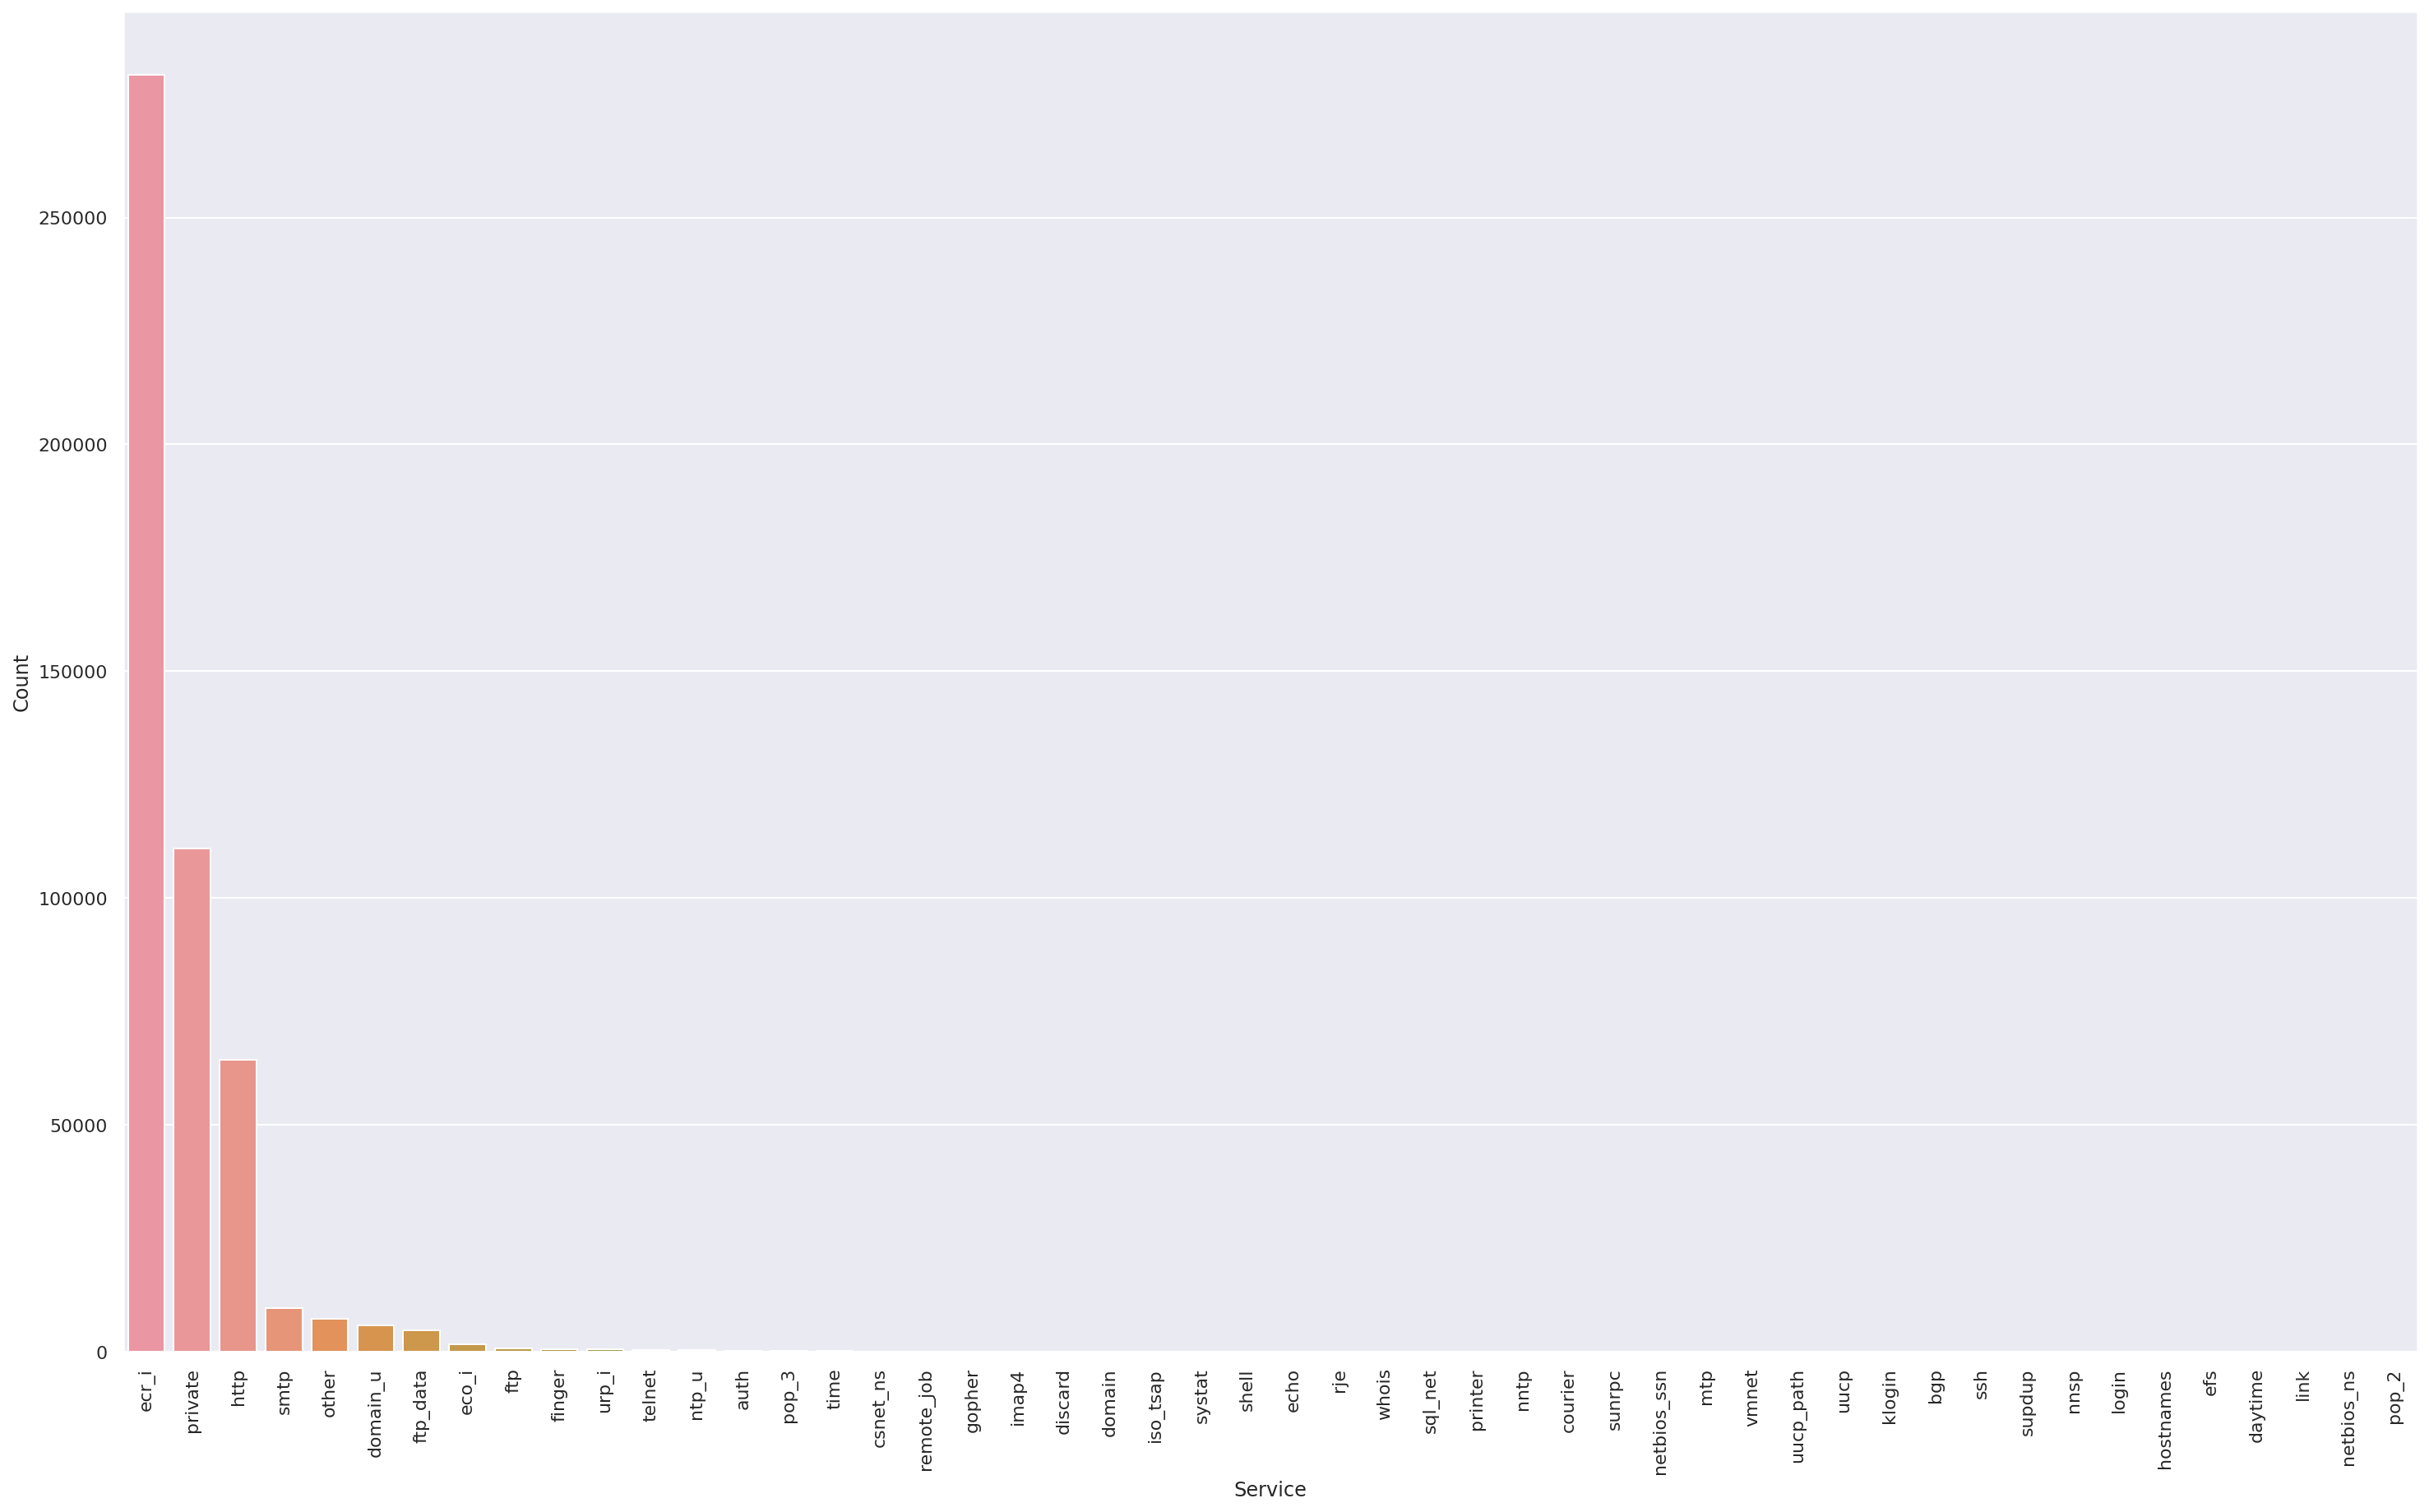

In [16]:
df3 = pd.DataFrame(columns = ['Service'])
df3['Service']=[each for each in kdd_df.service.unique()]
df3['Count']=[len(kdd_df[kdd_df.service==each]) for each in df3.Service]
df3=df3.sort_values(by=['Count'],ascending=False)

plt.figure(figsize=(25,15))
sns.barplot(x=df3.Service.head(50), y=df3.Count.head(50))
plt.xticks(rotation= 90)
plt.xlabel('Service')
plt.ylabel('Count')
plt.show()

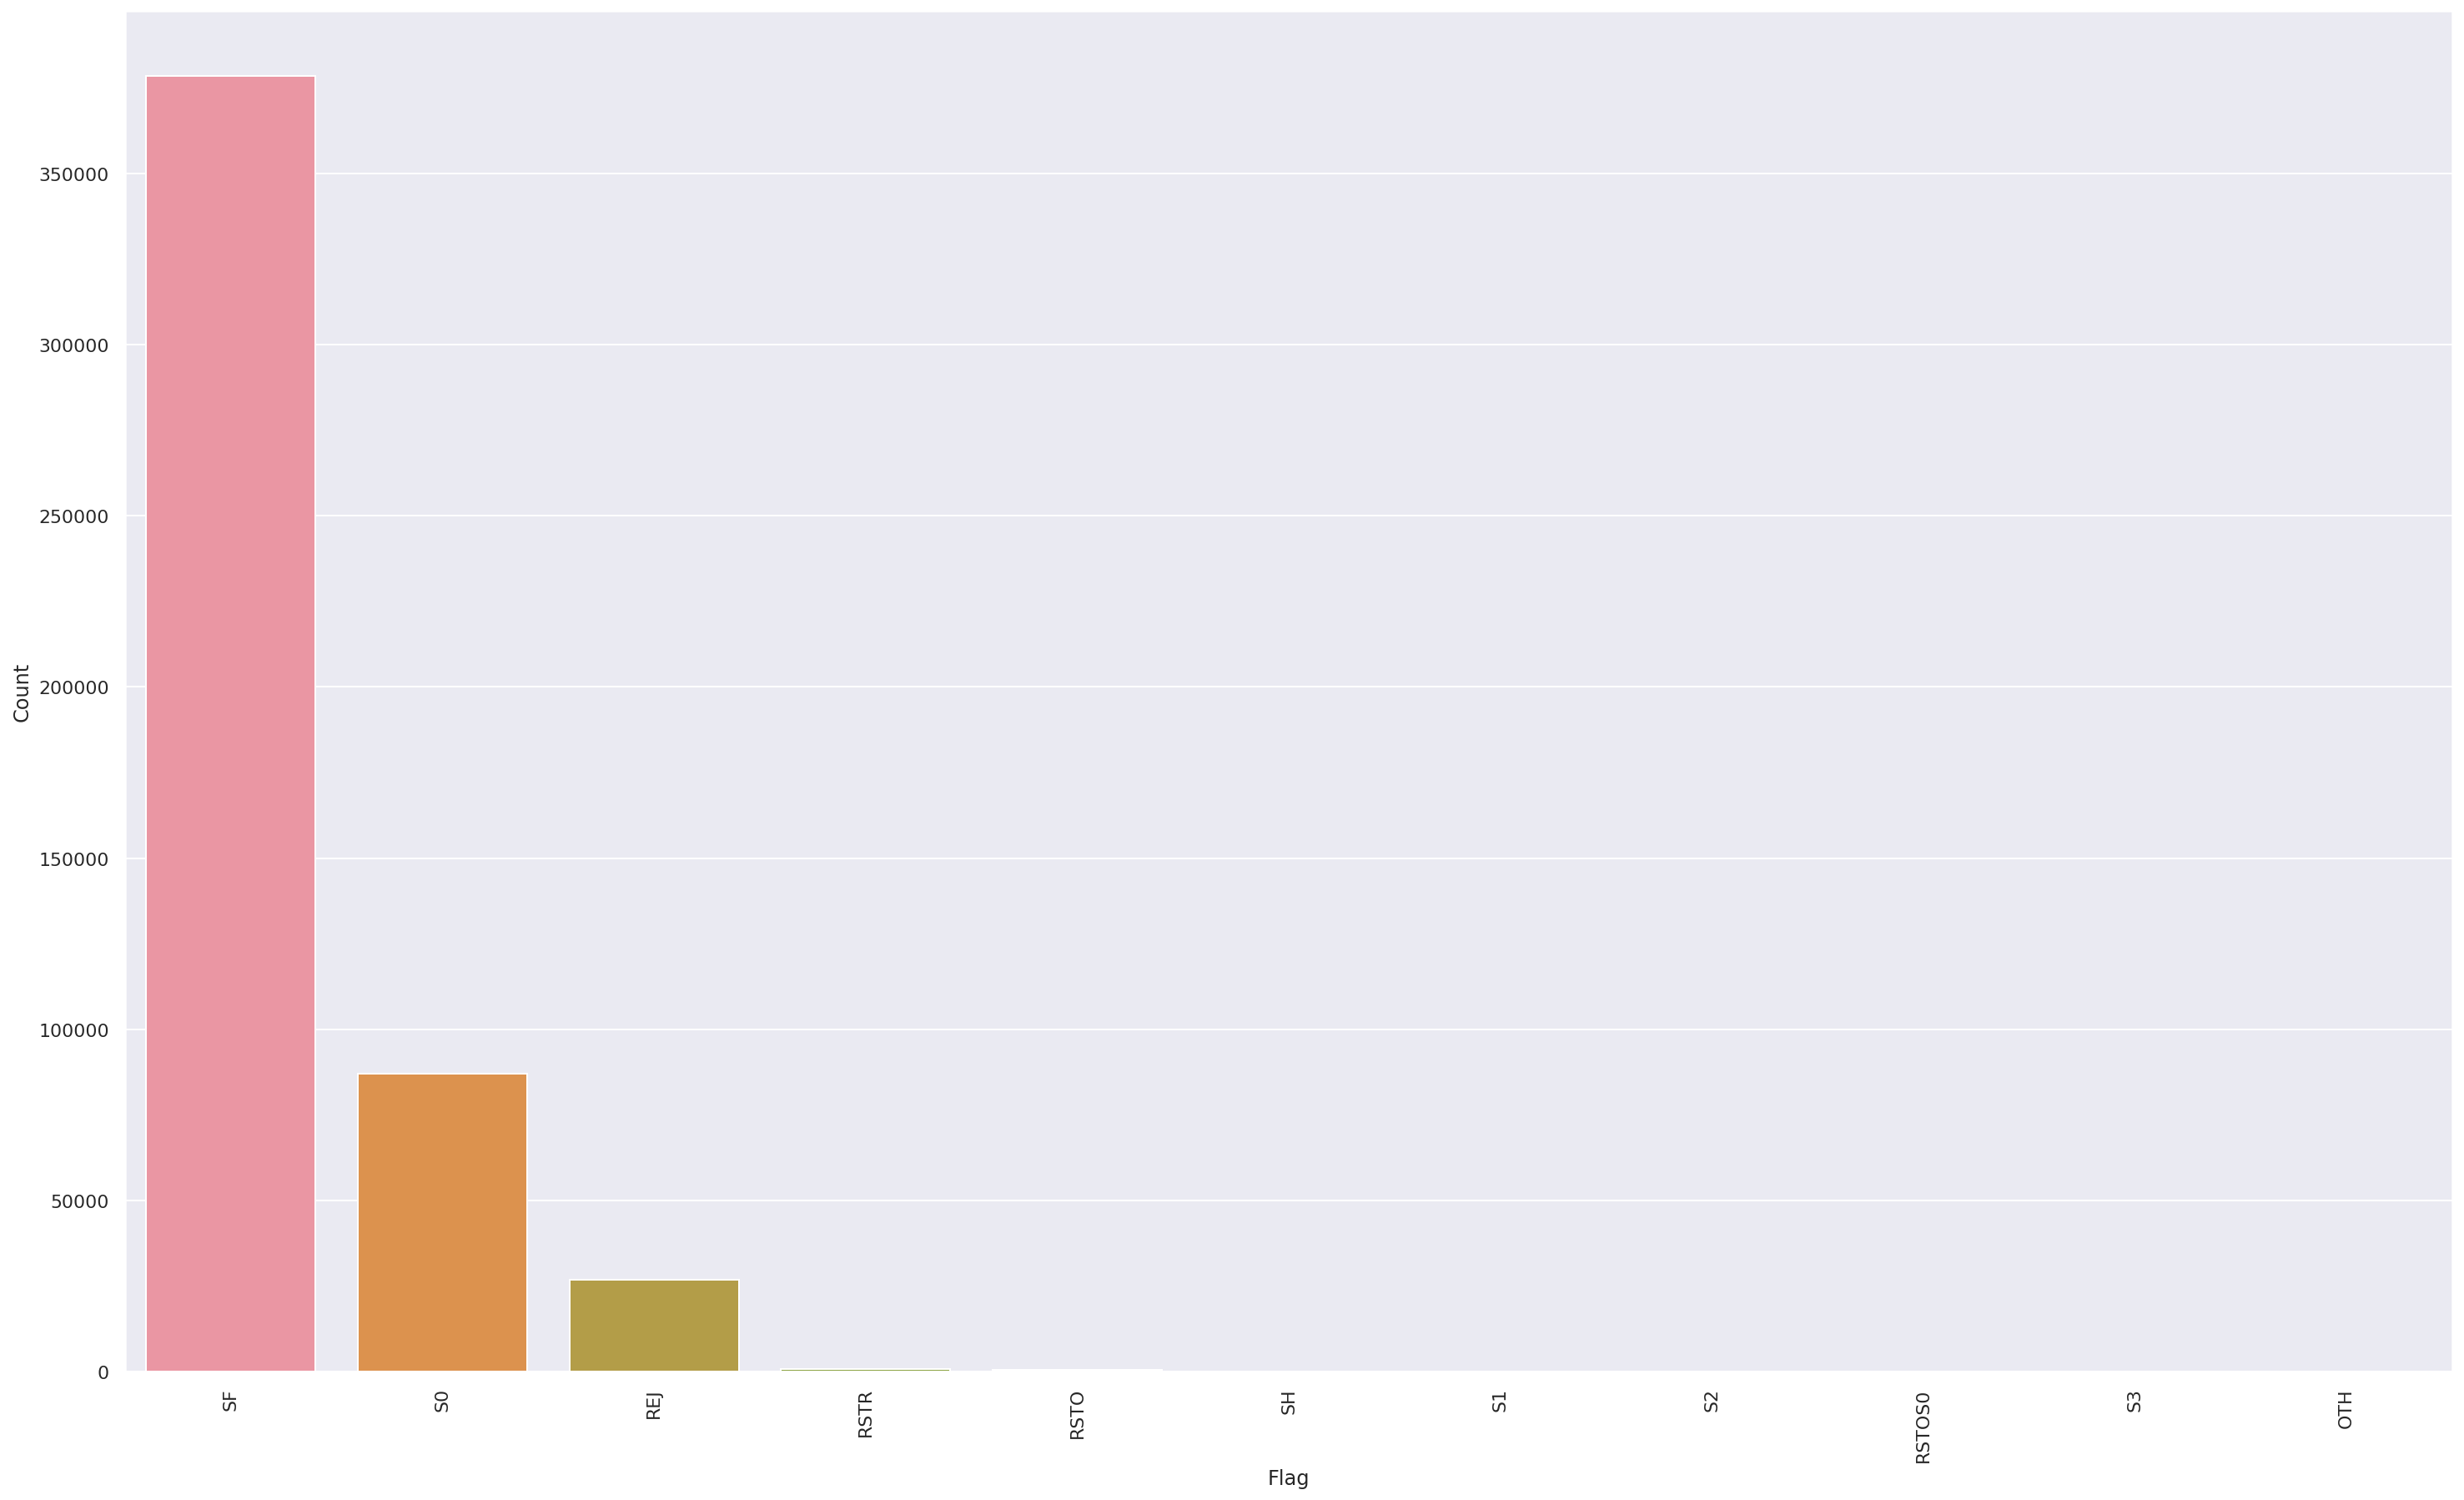

In [17]:
df4 = pd.DataFrame(columns = ['Flag'])
df4['Flag']=[each for each in kdd_df.flag.unique()]
df4['Count']=[len(kdd_df[kdd_df.flag==each]) for each in df4.Flag]
df4=df4.sort_values(by=['Count'],ascending=False)

plt.figure(figsize=(25,15))
sns.barplot(x=df4.Flag.head(50), y=df4.Count.head(50))
plt.xticks(rotation= 90)
plt.xlabel('Flag')
plt.ylabel('Count')
plt.show()

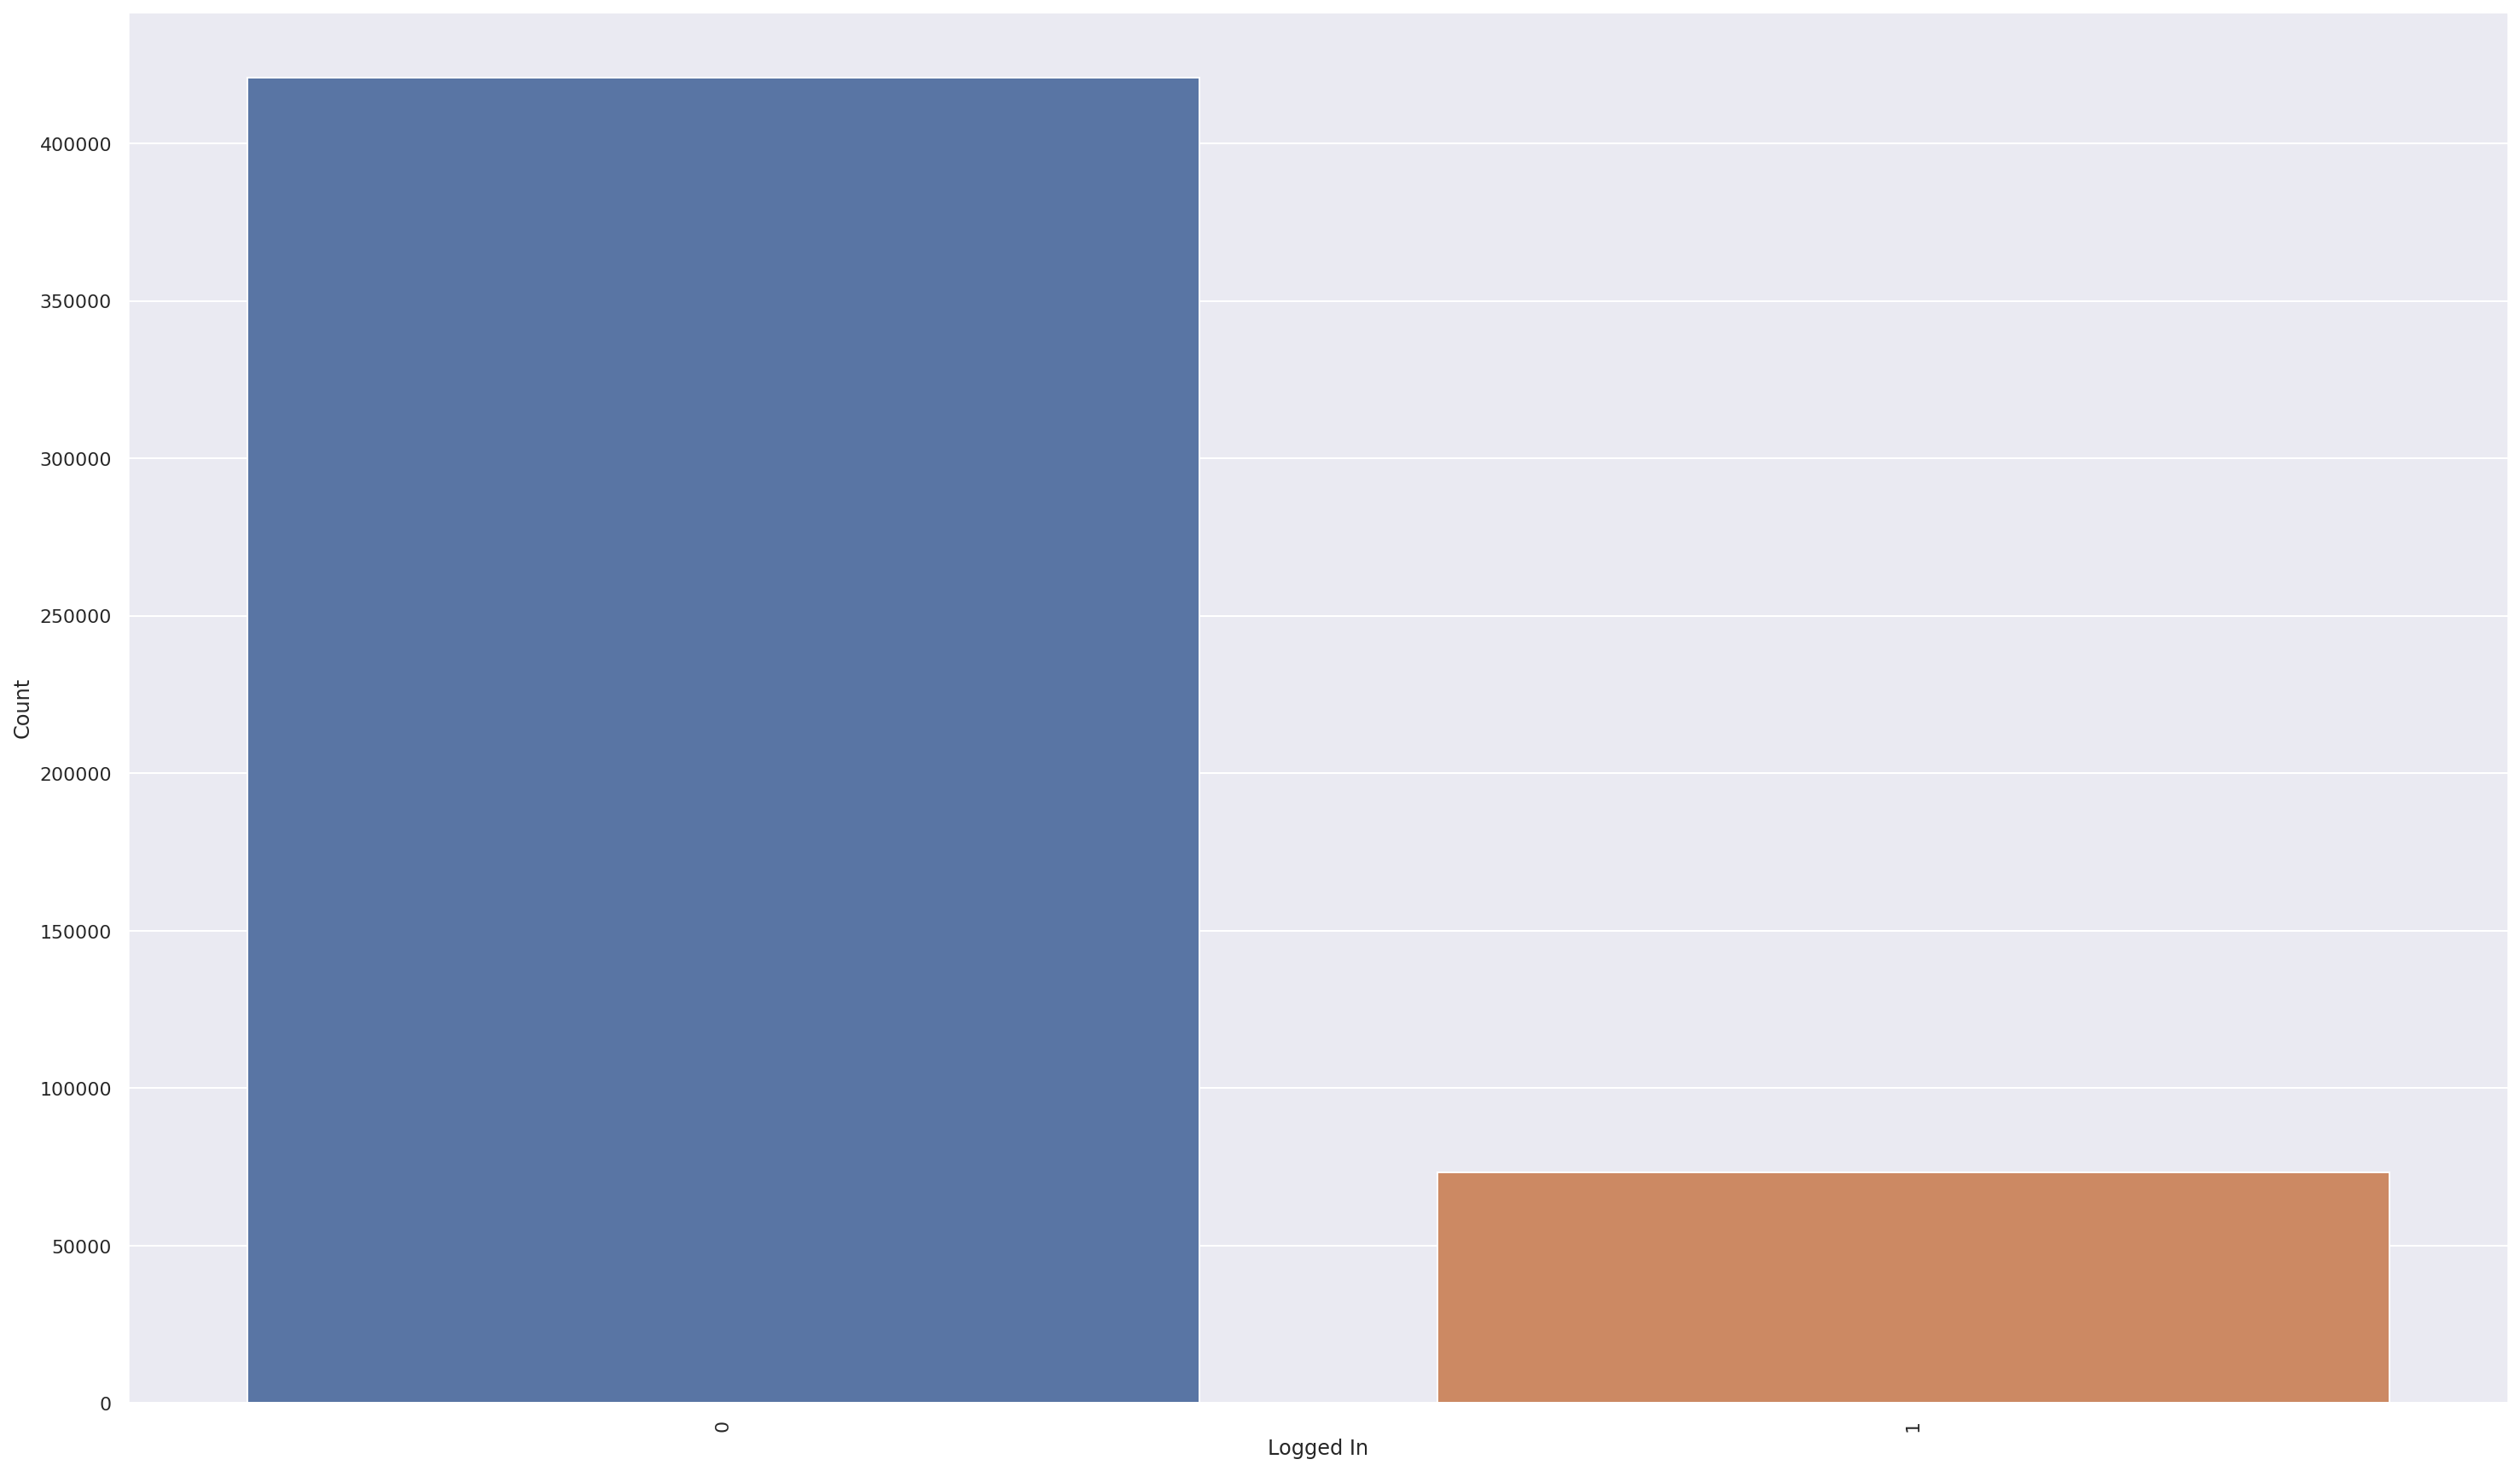

In [18]:
df5 = pd.DataFrame(columns = ['Logged_In'])
df5['Logged_In']=[each for each in kdd_df.logged_in.unique()]
df5['Count']=[len(kdd_df[kdd_df.logged_in==each]) for each in df5.Logged_In]
df5=df5.sort_values(by=['Count'],ascending=False)

plt.figure(figsize=(25,15))
sns.barplot(x=df5.Logged_In.head(50), y=df5.Count.head(50))
plt.xticks(rotation= 90)
plt.xlabel('Logged In')
plt.ylabel('Count')
plt.show()

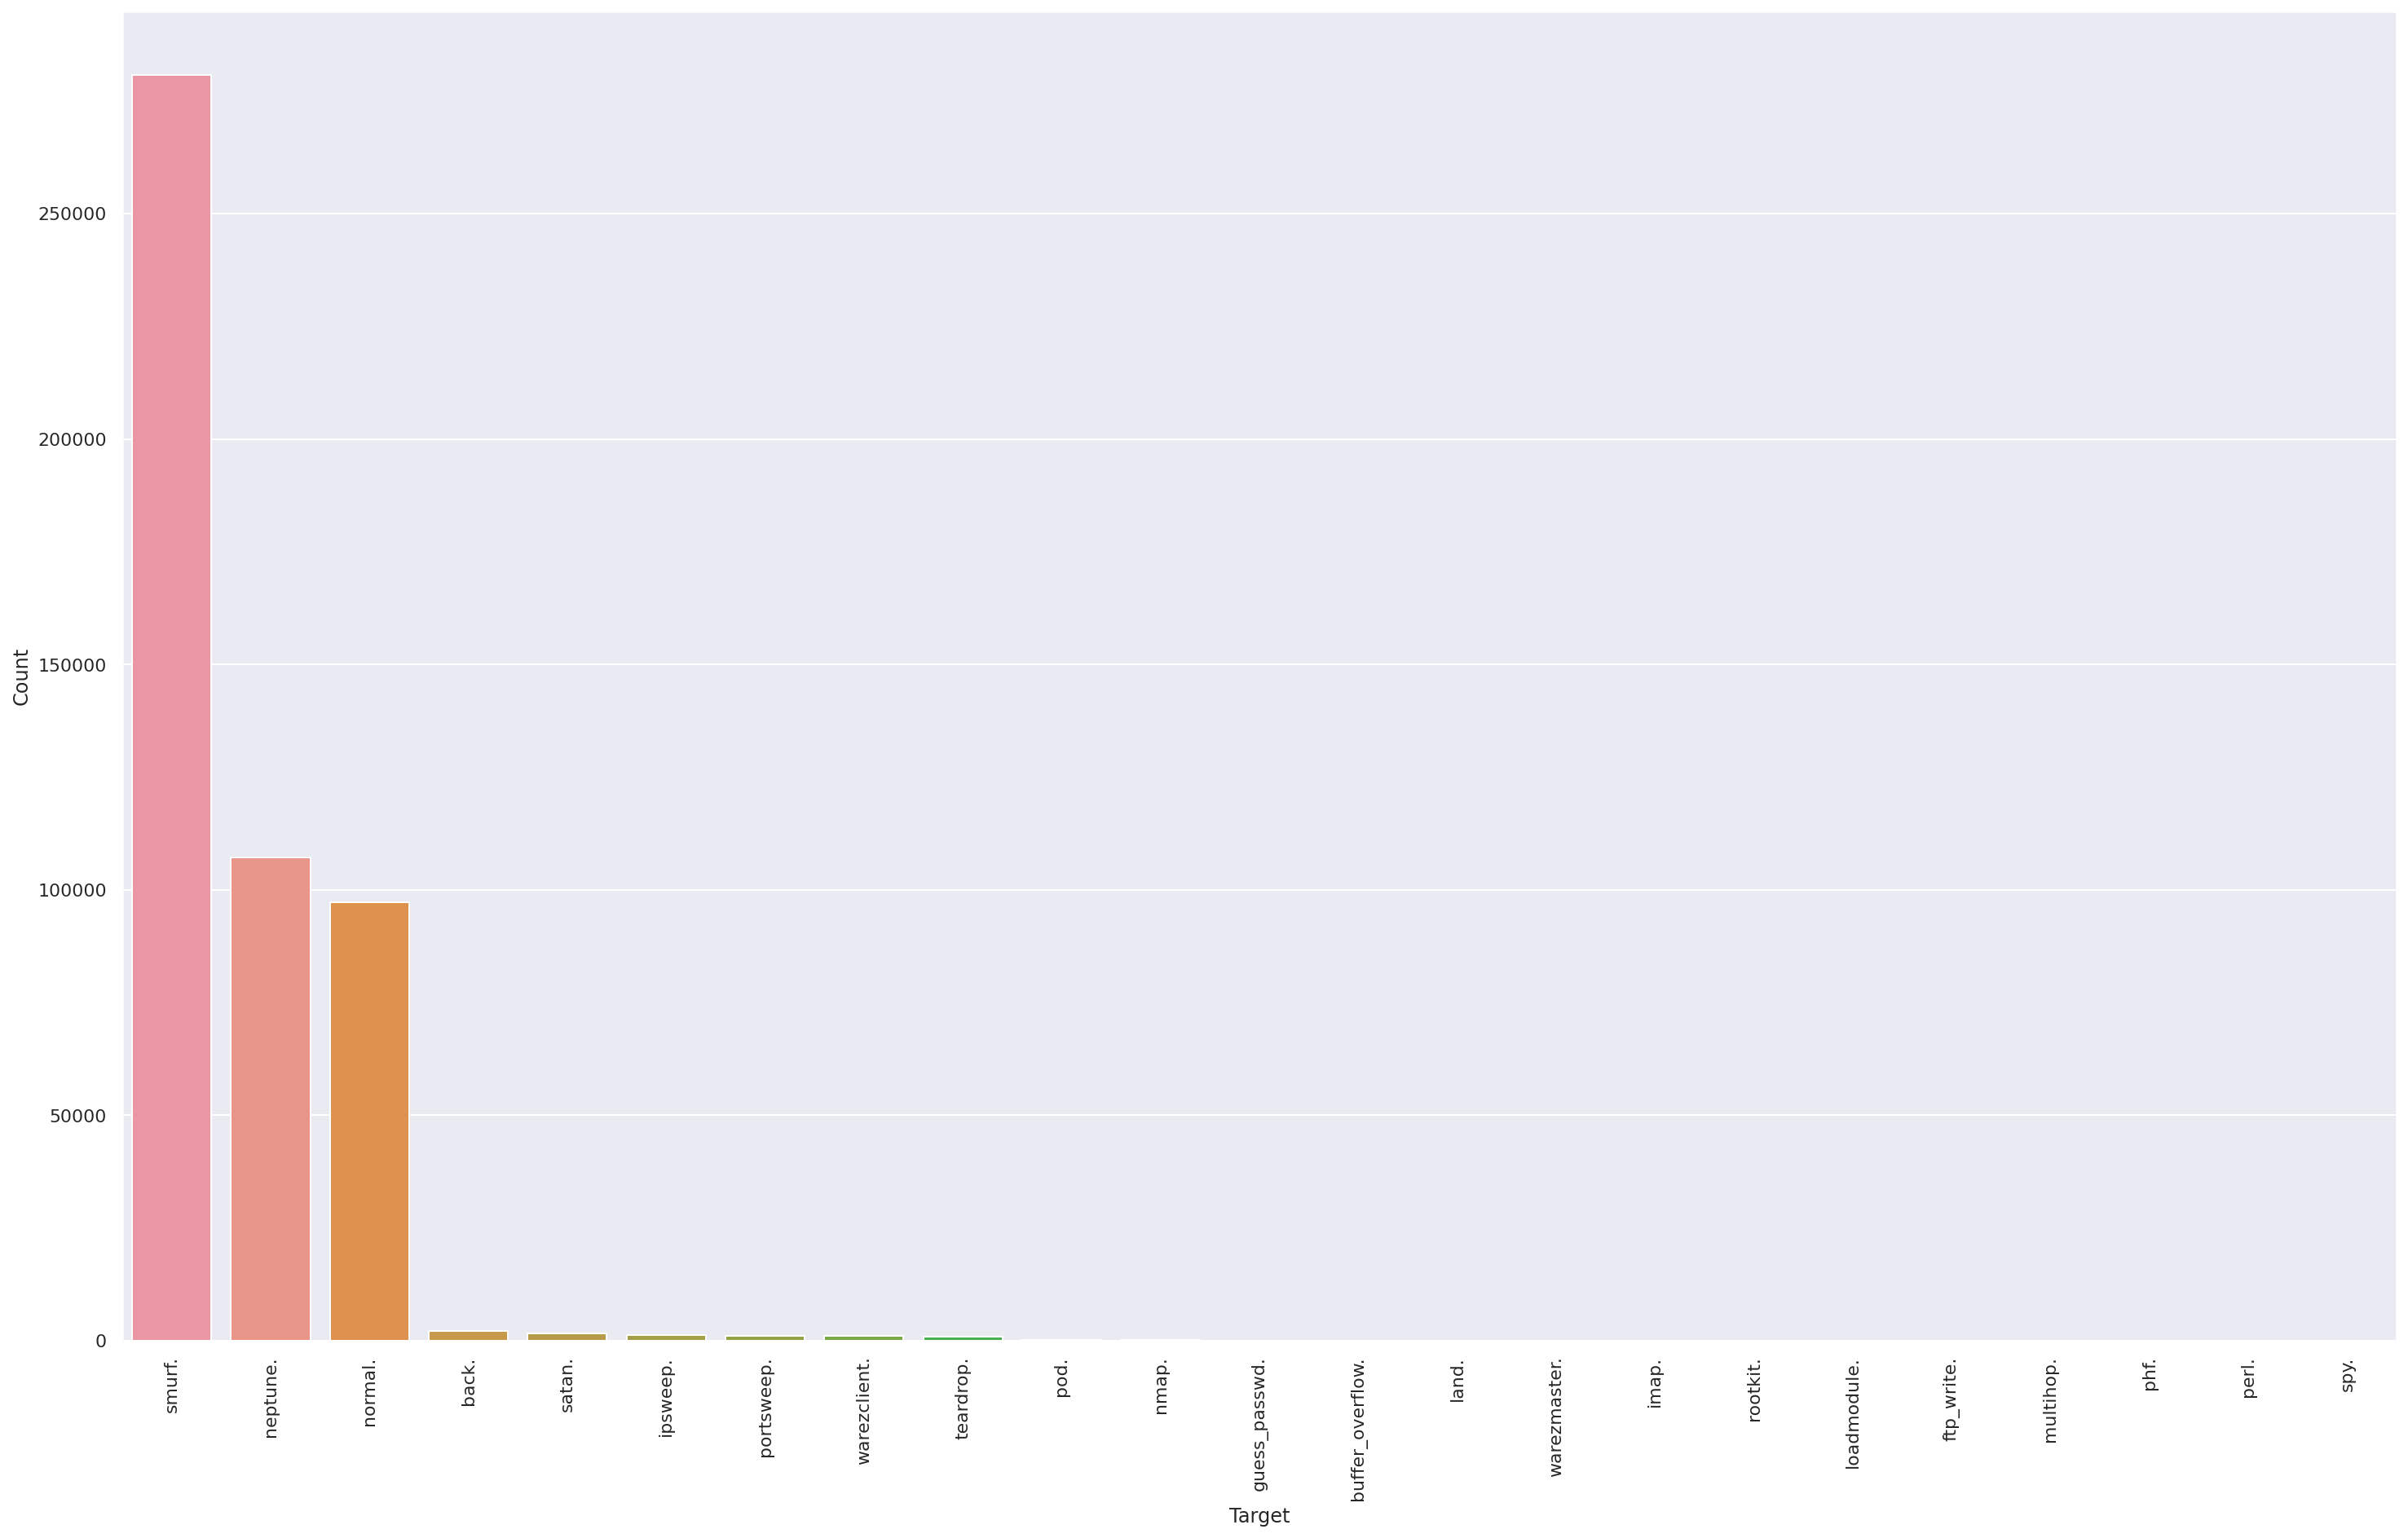

In [19]:
df6 = pd.DataFrame(columns = ['Target'])
df6['Target']=[each for each in kdd_df.target.unique()]
df6['Count']=[len(kdd_df[kdd_df.target==each]) for each in df6.Target]
df6=df6.sort_values(by=['Count'],ascending=False)

plt.figure(figsize=(25,15))
sns.barplot(x=df6.Target.head(50), y=df6.Count.head(50))
plt.xticks(rotation= 90)
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

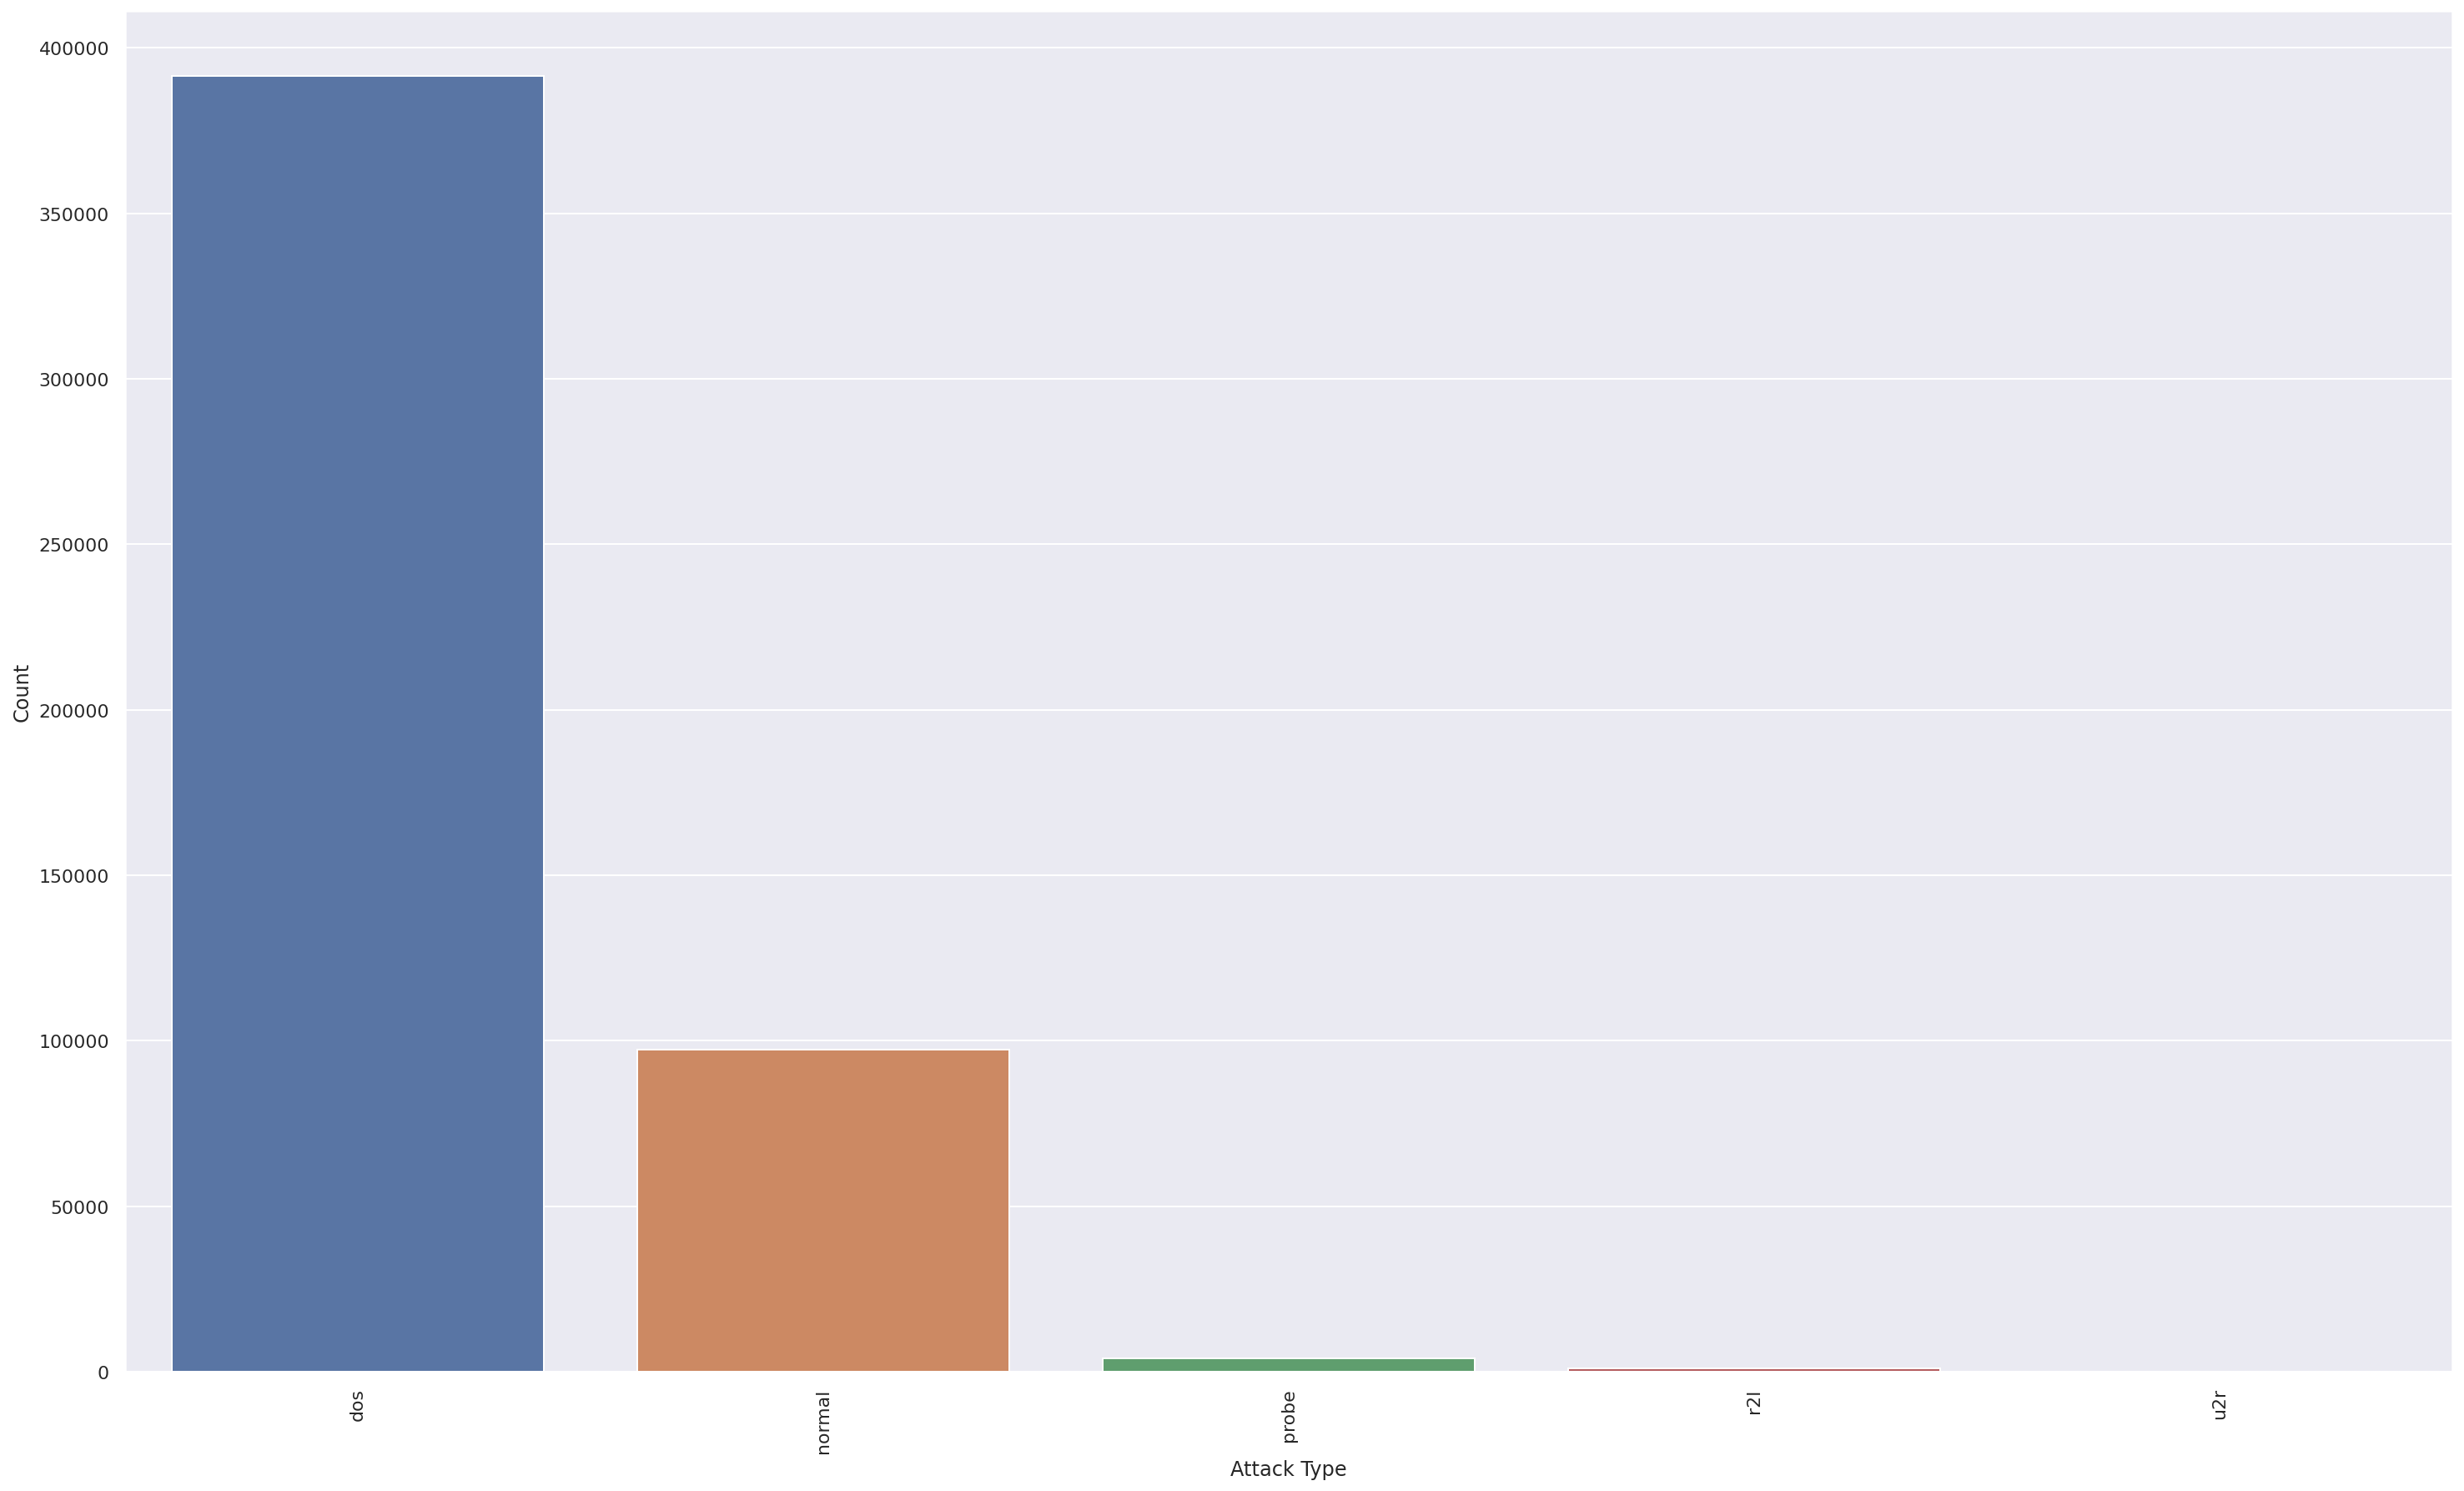

In [20]:
df7 = pd.DataFrame(columns = ['Attack_Type'])
df7['Attack_Type']=[each for each in kdd_df.Attack_Type.unique()]
df7['Count']=[len(kdd_df[kdd_df.Attack_Type==each]) for each in df7.Attack_Type]
df7=df7.sort_values(by=['Count'],ascending=False)

plt.figure(figsize=(25,15))
sns.barplot(x=df7.Attack_Type.head(50), y=df7.Count.head(50))
plt.xticks(rotation= 90)
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


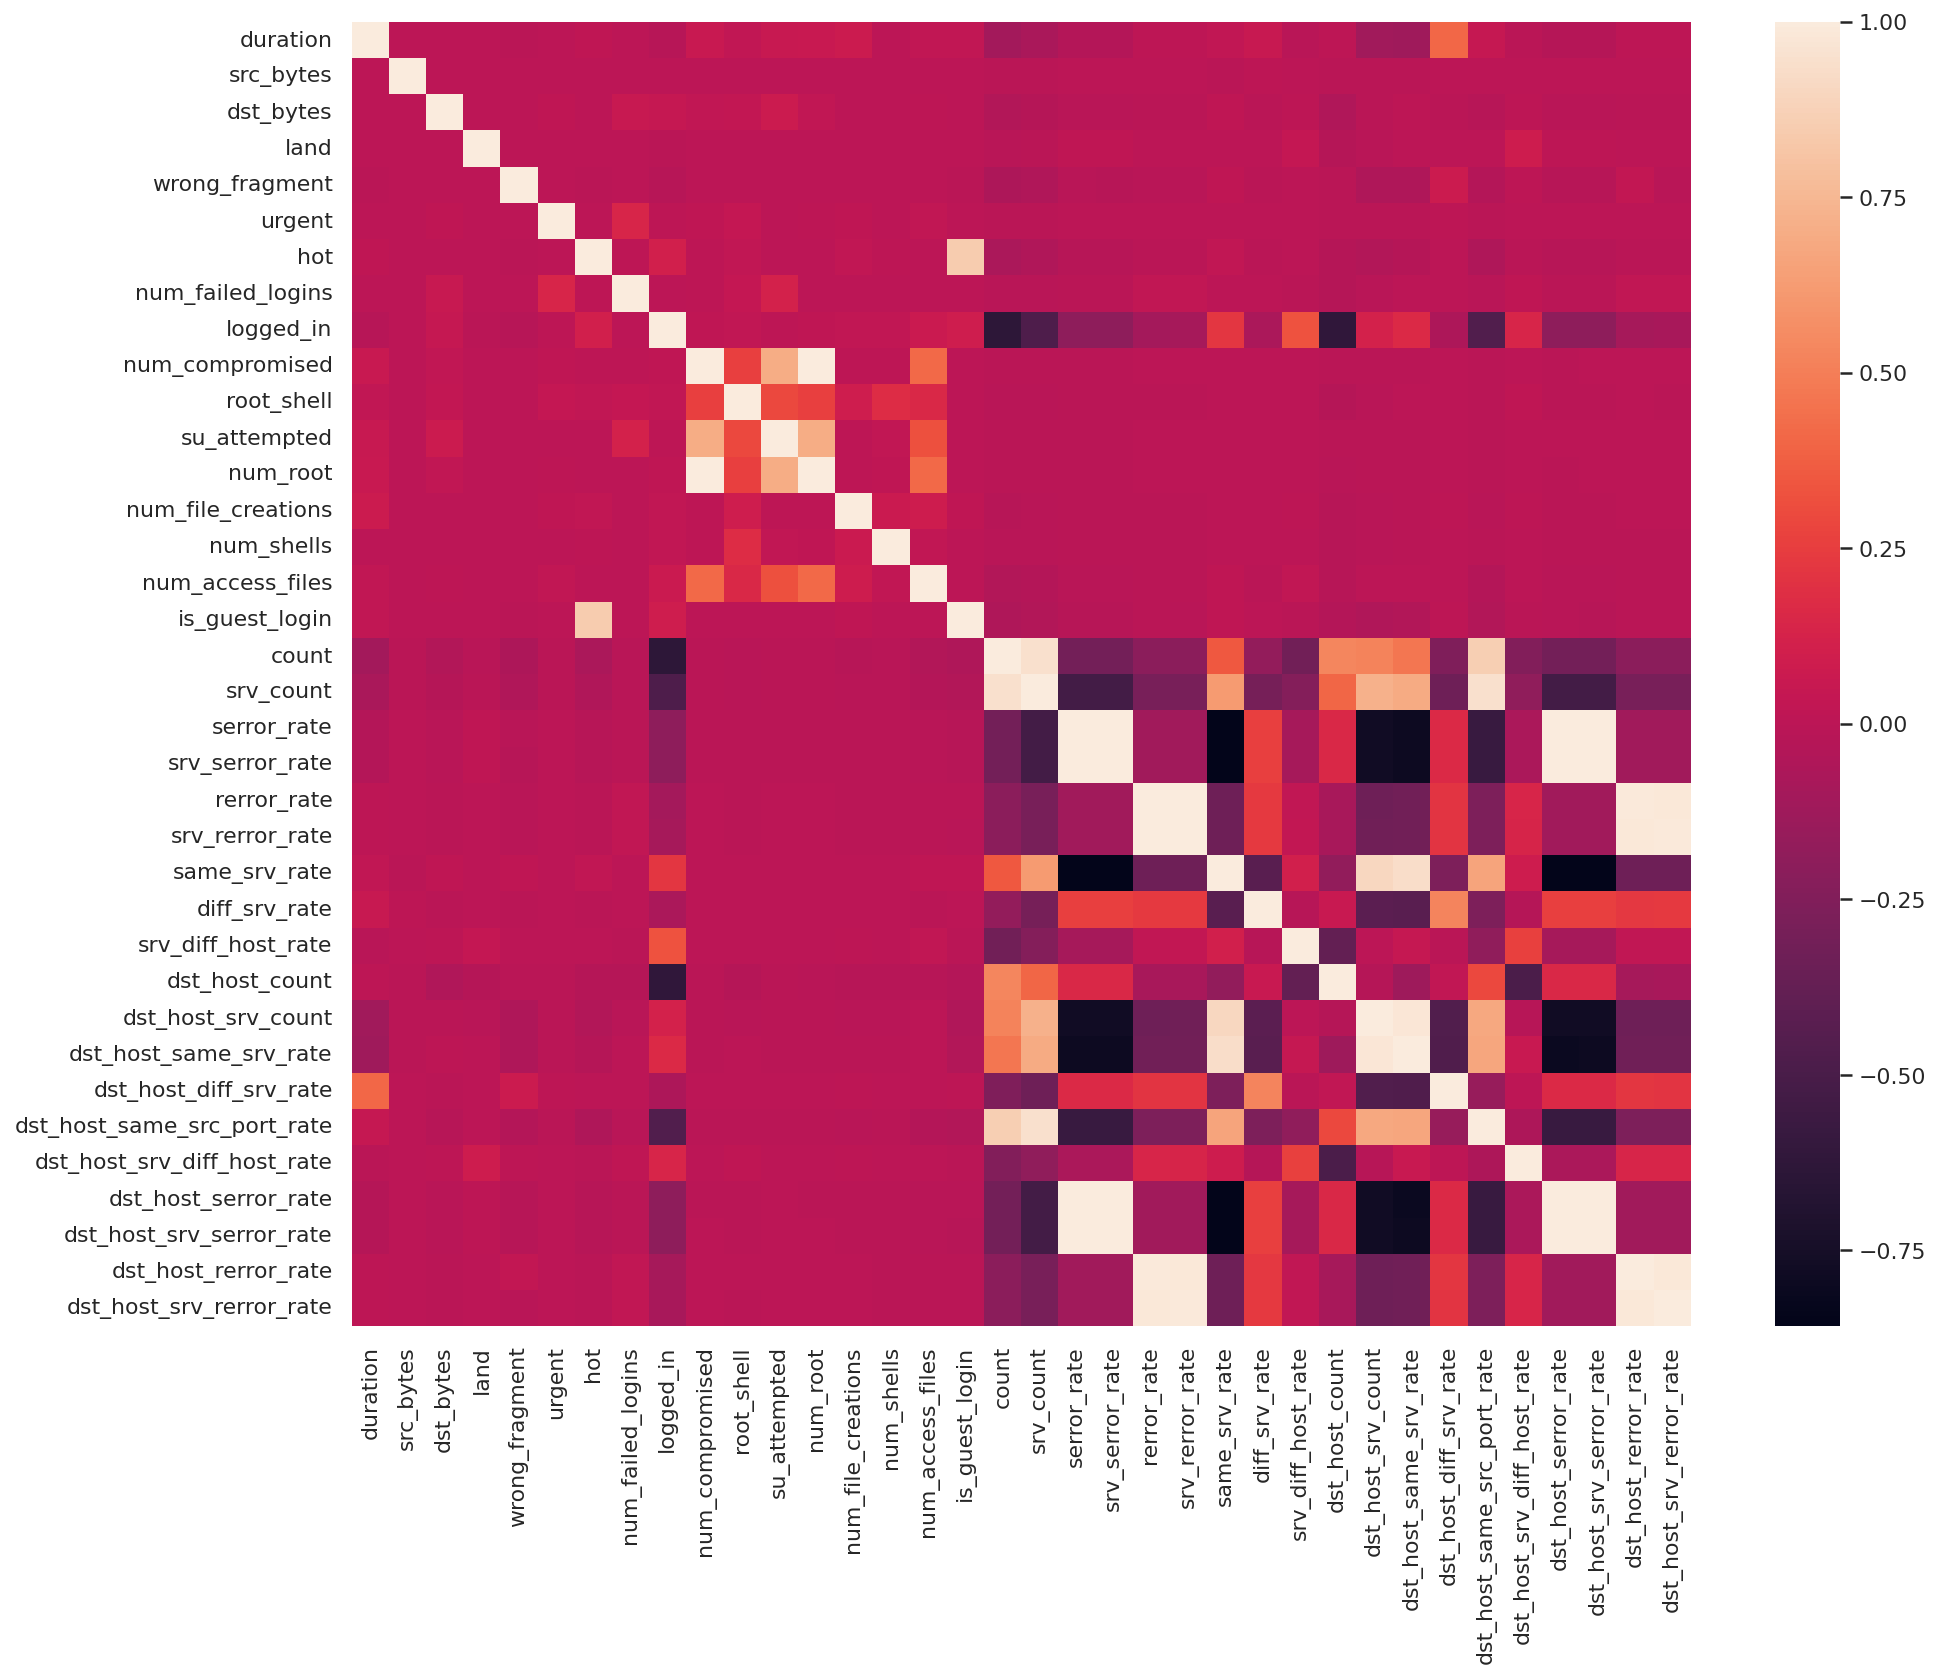

In [21]:
# Data Correlation – Find the highly correlated variables using heatmap and ignore them for analysis.

kdd_df = kdd_df.dropna('columns') # Drop columns with NaN

kdd_df = kdd_df[[col for col in kdd_df if kdd_df[col].nunique() > 1]] # Keep columns where there are more than 1 unique values

corr = kdd_df.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

In [22]:
kdd_df['num_root'].corr(kdd_df['num_compromised'])

0.9938277978738127

In [23]:
kdd_df['srv_serror_rate'].corr(kdd_df['serror_rate'])

0.9983615072725588

In [24]:
kdd_df['srv_count'].corr(kdd_df['count'])

0.9436670688882609

In [25]:
kdd_df['srv_rerror_rate'].corr(kdd_df['rerror_rate'])

0.9947309539818194

In [26]:
kdd_df['dst_host_same_srv_rate'].corr(kdd_df['dst_host_srv_count'])

0.9736854572953938

In [27]:
kdd_df['dst_host_srv_serror_rate'].corr(kdd_df['dst_host_serror_rate'])

0.9981559173373276

In [28]:
kdd_df['dst_host_srv_rerror_rate'].corr(kdd_df['dst_host_rerror_rate'])

0.9848038371110385

In [29]:
kdd_df['dst_host_same_srv_rate'].corr(kdd_df['same_srv_rate'])

0.9278080342691319

In [30]:
kdd_df['dst_host_srv_count'].corr(kdd_df['same_srv_rate'])

0.8989546630323972

In [31]:
kdd_df['dst_host_same_src_port_rate'].corr(kdd_df['srv_count'])

0.9449263676783213

In [32]:
kdd_df['dst_host_serror_rate'].corr(kdd_df['serror_rate'])

0.9986729680105016

In [33]:
kdd_df['dst_host_serror_rate'].corr(kdd_df['srv_serror_rate'])

0.997835300373957

In [34]:
kdd_df['dst_host_srv_serror_rate'].corr(kdd_df['serror_rate'])

0.9978492485679914

In [35]:
kdd_df['dst_host_srv_serror_rate'].corr(kdd_df['srv_serror_rate'])

0.9993041091849968

In [36]:
kdd_df['dst_host_rerror_rate'].corr(kdd_df['rerror_rate'])

0.986994792495607

In [37]:
kdd_df['dst_host_rerror_rate'].corr(kdd_df['srv_rerror_rate'])

0.9821663427308442

In [38]:
kdd_df['dst_host_srv_rerror_rate'].corr(kdd_df['rerror_rate'])

0.9851995540751448

In [39]:
kdd_df['dst_host_srv_rerror_rate'].corr(kdd_df['srv_rerror_rate'])

0.986570543884572

In [40]:
# Drop highly correlated variables as these should be ignored for learning
kdd_df.drop('num_root',axis = 1,inplace = True)
kdd_df.drop('srv_serror_rate',axis = 1,inplace = True)
kdd_df.drop('srv_rerror_rate',axis = 1, inplace=True)
kdd_df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)
kdd_df.drop('dst_host_serror_rate',axis = 1, inplace=True)
kdd_df.drop('dst_host_rerror_rate',axis = 1, inplace=True)
kdd_df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)
kdd_df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

# Drop 'service' since provides no useful information for learning
kdd_df.drop('service',axis = 1, inplace=True)

In [41]:
kdd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   flag                         494021 non-null  object 
 3   src_bytes                    494021 non-null  int64  
 4   dst_bytes                    494021 non-null  int64  
 5   land                         494021 non-null  int64  
 6   wrong_fragment               494021 non-null  int64  
 7   urgent                       494021 non-null  int64  
 8   hot                          494021 non-null  int64  
 9   num_failed_logins            494021 non-null  int64  
 10  logged_in                    494021 non-null  int64  
 11  num_compromised              494021 non-null  int64  
 12  root_shell                   494021 non-null  int64  
 13 

In [42]:
kdd_df.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack_Type
0,0,tcp,SF,181,5450,0,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,tcp,SF,239,486,0,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,tcp,SF,235,1337,0,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,tcp,SF,219,1337,0,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,tcp,SF,217,2032,0,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [43]:
# Feature Mapping
#protocol_type feature mapping
pmap = {'icmp':0,'tcp':1,'udp':2}
kdd_df['protocol_type'] = kdd_df['protocol_type'].map(pmap)

#flag feature mapping
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
kdd_df['flag'] = kdd_df['flag'].map(fmap)

kdd_df.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack_Type
0,0,1,0,181,5450,0,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,1,0,239,486,0,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,1,0,235,1337,0,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,1,0,219,1337,0,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,1,0,217,2032,0,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [44]:
kdd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  int64  
 2   flag                         494021 non-null  int64  
 3   src_bytes                    494021 non-null  int64  
 4   dst_bytes                    494021 non-null  int64  
 5   land                         494021 non-null  int64  
 6   wrong_fragment               494021 non-null  int64  
 7   urgent                       494021 non-null  int64  
 8   hot                          494021 non-null  int64  
 9   num_failed_logins            494021 non-null  int64  
 10  logged_in                    494021 non-null  int64  
 11  num_compromised              494021 non-null  int64  
 12  root_shell                   494021 non-null  int64  
 13 

In [45]:
# Import sklearn modelling tools 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [46]:
# Split the dataset
kdd_df = kdd_df.drop(['target', ], axis = 1)
print(kdd_df.shape)

# Split between target variable and train set
y = kdd_df[['Attack_Type']]
X = kdd_df.drop(['Attack_Type', ], axis = 1)

min_max_sc = MinMaxScaler() # Transform features by scaling each feature (ranfge = (0,1))
X = min_max_sc.fit_transform(X)

# Split dataset between training and testing set (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(494021, 31)
(395216, 30) (98805, 30)
(395216, 1) (98805, 1)


In [47]:
# Gaussian Naive Bayes Model
# GaussianNB implements the Gaussian Naive Bayes algorithm for classification. The likelihood of the features is assumed to be Gaussian
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

# Training GNB
start_time = time.time()
gnb.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

#Testing GNB
start_time = time.time()
y_test_pred = gnb.predict(X_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)

# GNB test and train scores
print("Train score is:", gnb.score(X_train, y_train))
print("Test score is:", gnb.score(X_test, y_test))

Training time:  0.5992763042449951
Testing time:  0.49419331550598145
Train score is: 0.8812295048783451
Test score is: 0.8810181670968068


In [48]:
# Decision Tree Classifier Model
# DecisionTreeClassifier is a class capable of performing multi-class classification on a dataset
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion ="entropy", max_depth = 4)

# Training DTC
start_time = time.time()
dtc.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

# Testing DTC
start_time = time.time()
y_test_pred = dtc.predict(X_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)

# DTC test and train scores
print("Train score is:", dtc.score(X_train, y_train))
print("Test score is:", dtc.score(X_test, y_test))

Training time:  1.171201229095459
Testing time:  0.036440372467041016
Train score is: 0.9905747743006356
Test score is: 0.9905470370932645


In [49]:
# Random Forest Model
# A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
from sklearn.ensemble import RandomForestClassifier
rfst = RandomForestClassifier(n_estimators = 30)

# Training RF
start_time = time.time()
rfst.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

# Testing RF
start_time = time.time()
y_test_pred = rfst.predict(X_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)

# Rf test and train scores
print("Train score is:", rfst.score(X_train, y_train))
print("Test score is:", rfst.score(X_test, y_test))

Training time:  9.312507152557373
Testing time:  0.9714009761810303
Train score is: 0.9999797579045383
Test score is: 0.9996457669146298


In [50]:
# Support Vector Classifier
# SVC is capable of performing multi-class classification on a dataset implemeting implement the “one-versus-one” approach.
from sklearn.svm import SVC
svc = SVC(gamma = 'scale')

# Training SVC
start_time = time.time()
svc.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

# Testing SVC
start_time = time.time()
y_test_pred = svc.predict(X_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)
      
# SVC test and train scores
print("Train score is:", svc.score(X_train, y_train))
print("Test score is:", svc.score(X_test, y_test))

Training time:  535.6108849048615
Testing time:  153.09134078025818
Train score is: 0.9987804137484312
Test score is: 0.9987348818379637


In [65]:
# Logistic Regression
# Fits a linear model with coefficients  to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 1200000)

# Training LR
start_time = time.time()
lr.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

# Testing LR
start_time = time.time()
y_test_pred = lr.predict(X_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)

# LR test and train scores
print("Train score is:", lr.score(X_train, y_train))
print("Test score is:", lr.score(X_test, y_test))

Training time:  67.7704668045044
Testing time:  0.06434464454650879
Train score is: 0.9940918383871098
Test score is: 0.9941399726734477


In [51]:
# GradientBoostingClassifier
# This algorithm builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. 
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state = 0)

# Training GBC
start_time = time.time()
gbc.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

# Testing GBC
start_time = time.time()
y_test_pred = gbc.predict(X_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)

# SVC test and train scores
print("Train score is:", gbc.score(X_train, y_train))
print("Test score is:", gbc.score(X_test, y_test))

Training time:  326.8564202785492
Testing time:  2.273937940597534
Train score is: 0.9991144083235497
Test score is: 0.9988360912909265


In [62]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(iterations=50, random_seed=42, learning_rate=0.5, custom_loss=['AUC', 'Accuracy'])

start_time = time.time()
clf.fit(X_train, y_train, plot=True)
end_time = time.time()
print("Training time: ", end_time-start_time)

start_time = time.time()
y_test_pred = clf.predict(X_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)

# SVC test and train scores
print("Train score is:", clf.score(X_train, y_train))
print("Test score is:", clf.score(X_test, y_test))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.3090638	total: 329ms	remaining: 16.1s
1:	learn: 0.1769096	total: 629ms	remaining: 15.1s
2:	learn: 0.1054664	total: 928ms	remaining: 14.5s
3:	learn: 0.0656687	total: 1.29s	remaining: 14.9s
4:	learn: 0.0427139	total: 1.6s	remaining: 14.4s
5:	learn: 0.0277767	total: 1.94s	remaining: 14.2s
6:	learn: 0.0195638	total: 2.2s	remaining: 13.5s
7:	learn: 0.0137119	total: 2.46s	remaining: 12.9s
8:	learn: 0.0105859	total: 2.77s	remaining: 12.6s
9:	learn: 0.0082445	total: 3.07s	remaining: 12.3s
10:	learn: 0.0071445	total: 3.32s	remaining: 11.8s
11:	learn: 0.0063875	total: 3.55s	remaining: 11.2s
12:	learn: 0.0059219	total: 3.83s	remaining: 10.9s
13:	learn: 0.0055797	total: 4.05s	remaining: 10.4s
14:	learn: 0.0051367	total: 4.31s	remaining: 10.1s
15:	learn: 0.0046188	total: 4.8s	remaining: 10.2s
16:	learn: 0.0040378	total: 5.34s	remaining: 10.4s
17:	learn: 0.0039347	total: 5.78s	remaining: 10.3s
18:	learn: 0.0037341	total: 6.1s	remaining: 9.95s
19:	learn: 0.0036172	total: 6.32s	remaining: 

In [64]:
import lightgbm as lgb
lgbm = lgb.LGBMClassifier()

start_time = time.time()
lgbm.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

start_time = time.time()
y_test_pred = lgbm.predict(X_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)

print("Train score is:", lgbm.score(X_train, y_train))
print("Test score is:", lgbm.score(X_test, y_test))

Training time:  14.214693546295166
Testing time:  7.145160436630249
Train score is: 0.9785686814299016
Test score is: 0.978027427761753


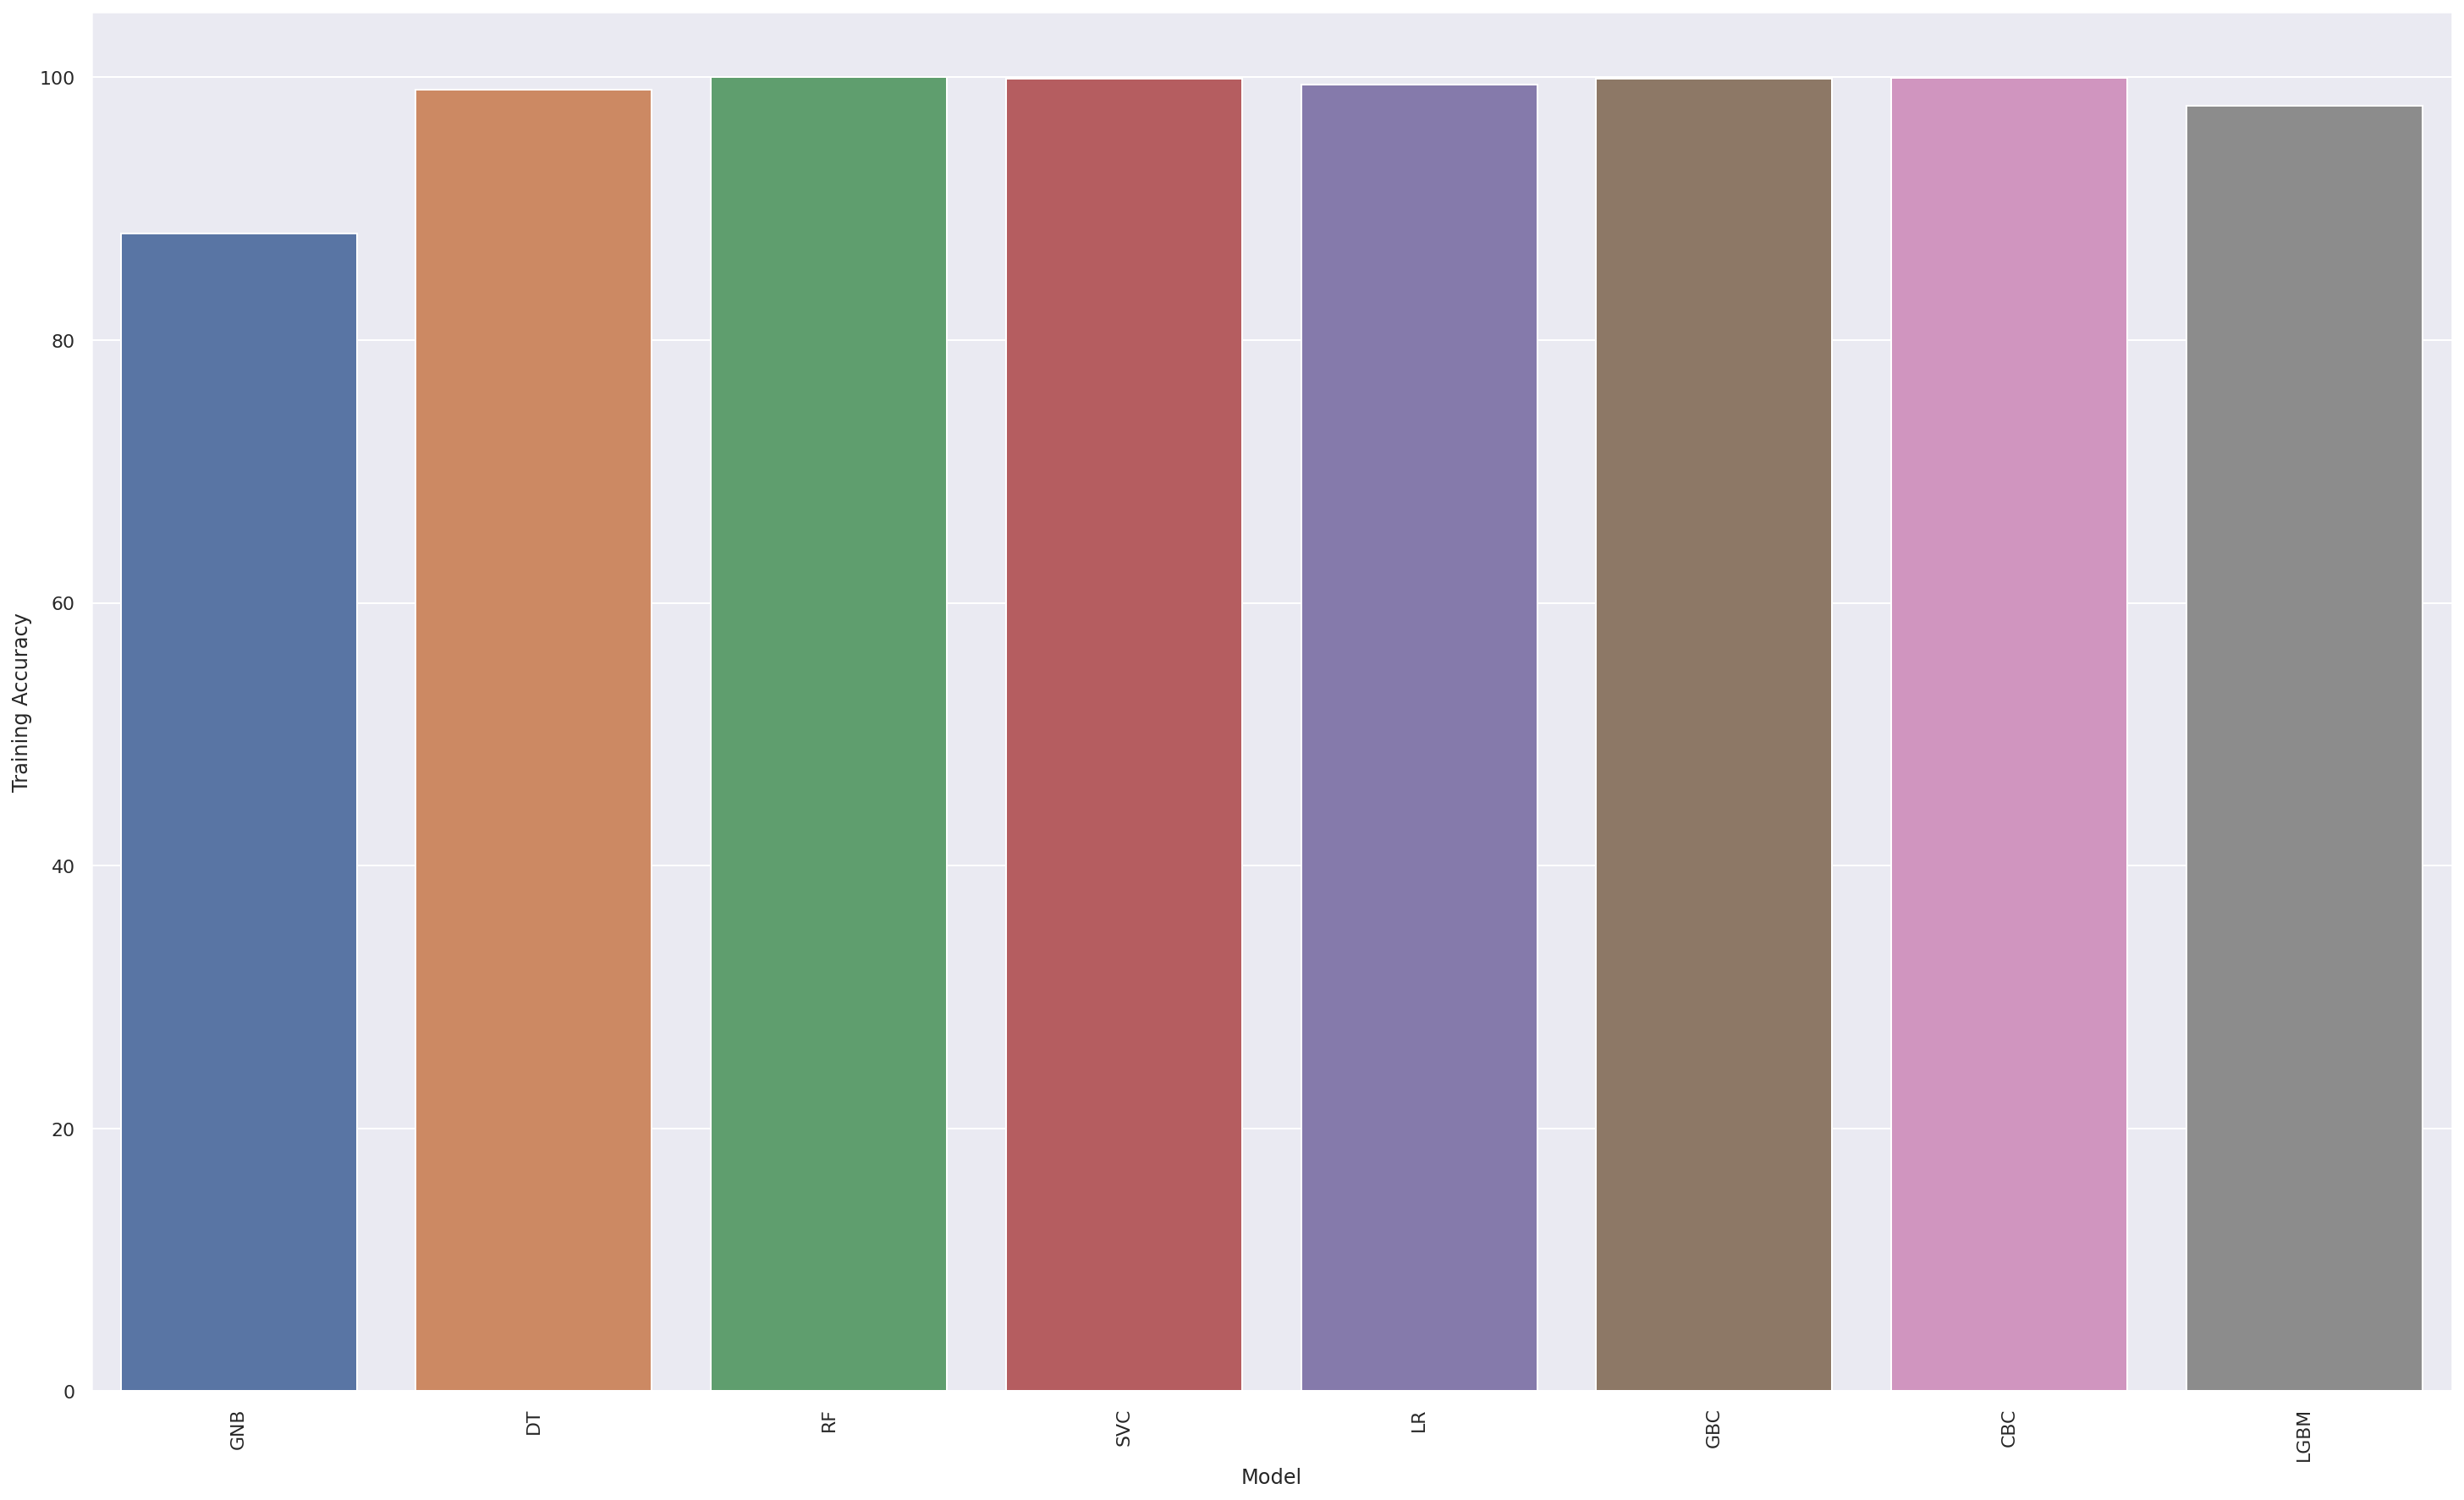

In [66]:
names = ['GNB', 'DT', 'RF', 'SVC', 'LR', 'GBC', 'CBC', 'LGBM']
values = [88.122, 99.057, 99.997, 99.878, 99.409, 99.911, 99.974, 97.856]

plt.figure(figsize=(25,15))
sns.barplot(x=names, y=values)
plt.xticks(rotation= 90)
plt.xlabel('Model')
plt.ylabel('Training Accuracy')
plt.show()

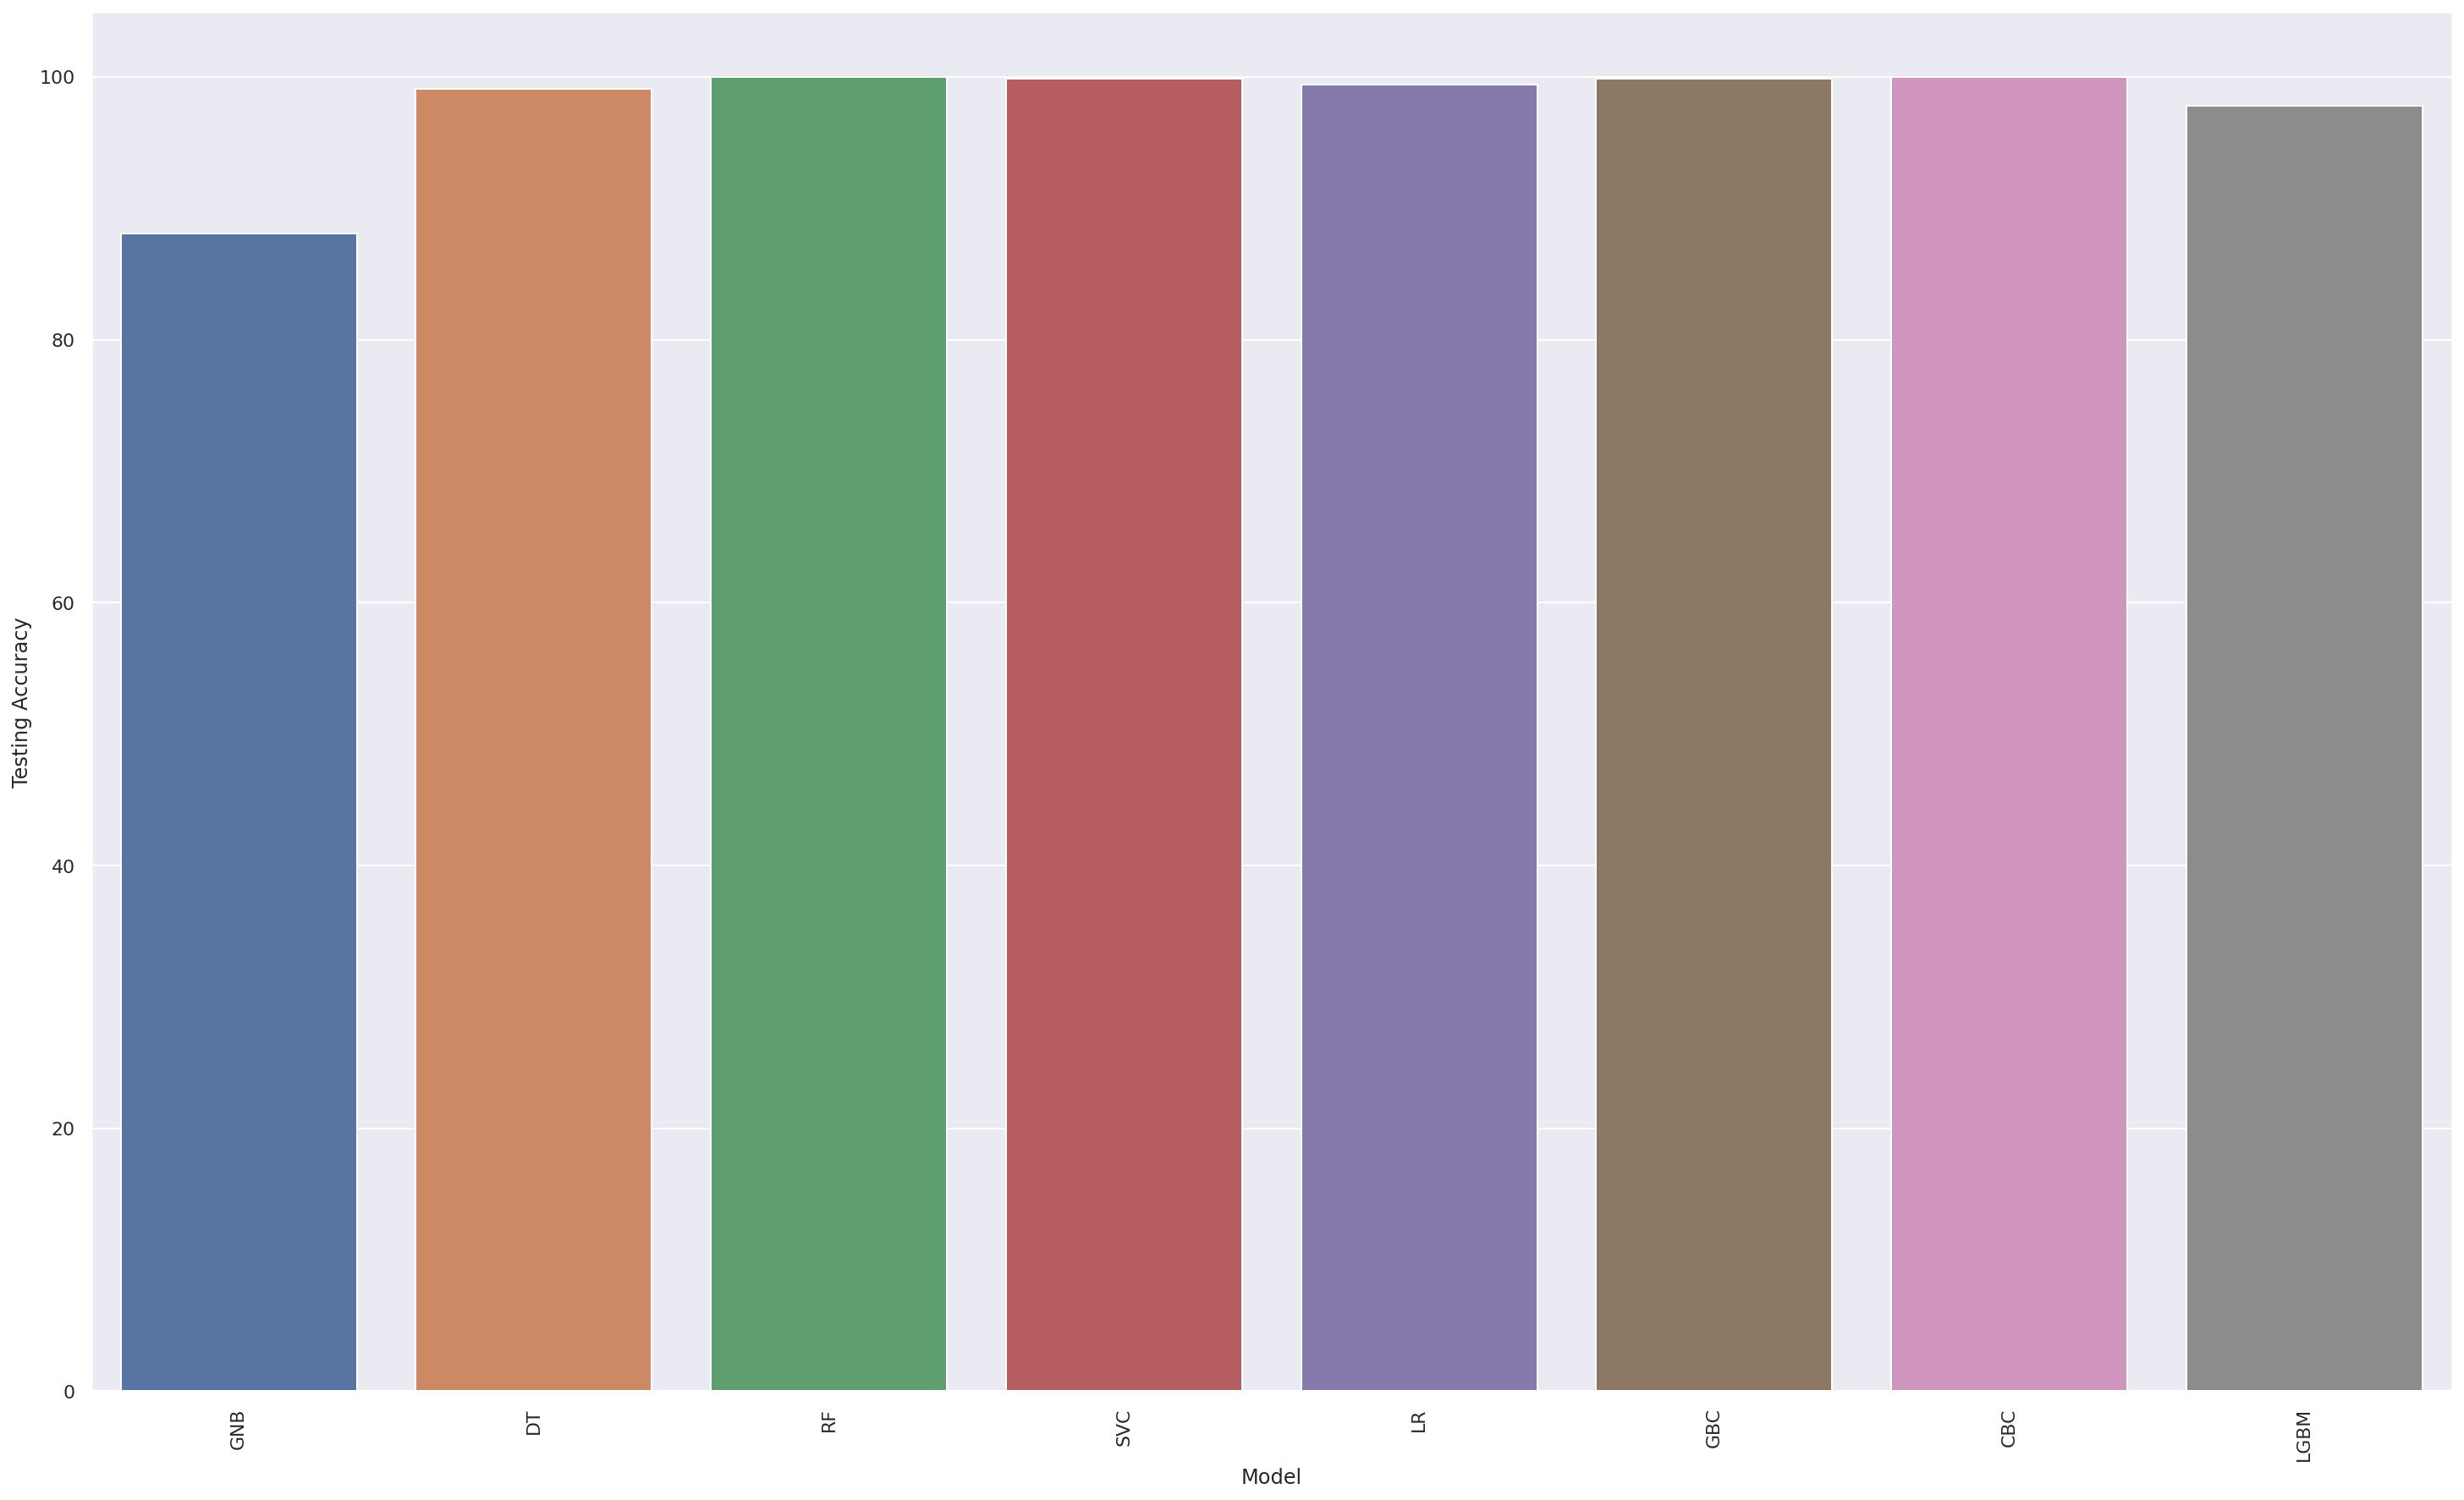

In [68]:
names = ['GNB', 'DT', 'RF', 'SVC', 'LR', 'GBC', 'CBC', 'LGBM']
values = [88.101, 99.054, 99.964, 99.873, 99.413, 99.883, 99.959, 97.802]

plt.figure(figsize=(25,15))
sns.barplot(x=names, y=values)
plt.xticks(rotation= 90)
plt.xlabel('Model')
plt.ylabel('Testing Accuracy')
plt.show()

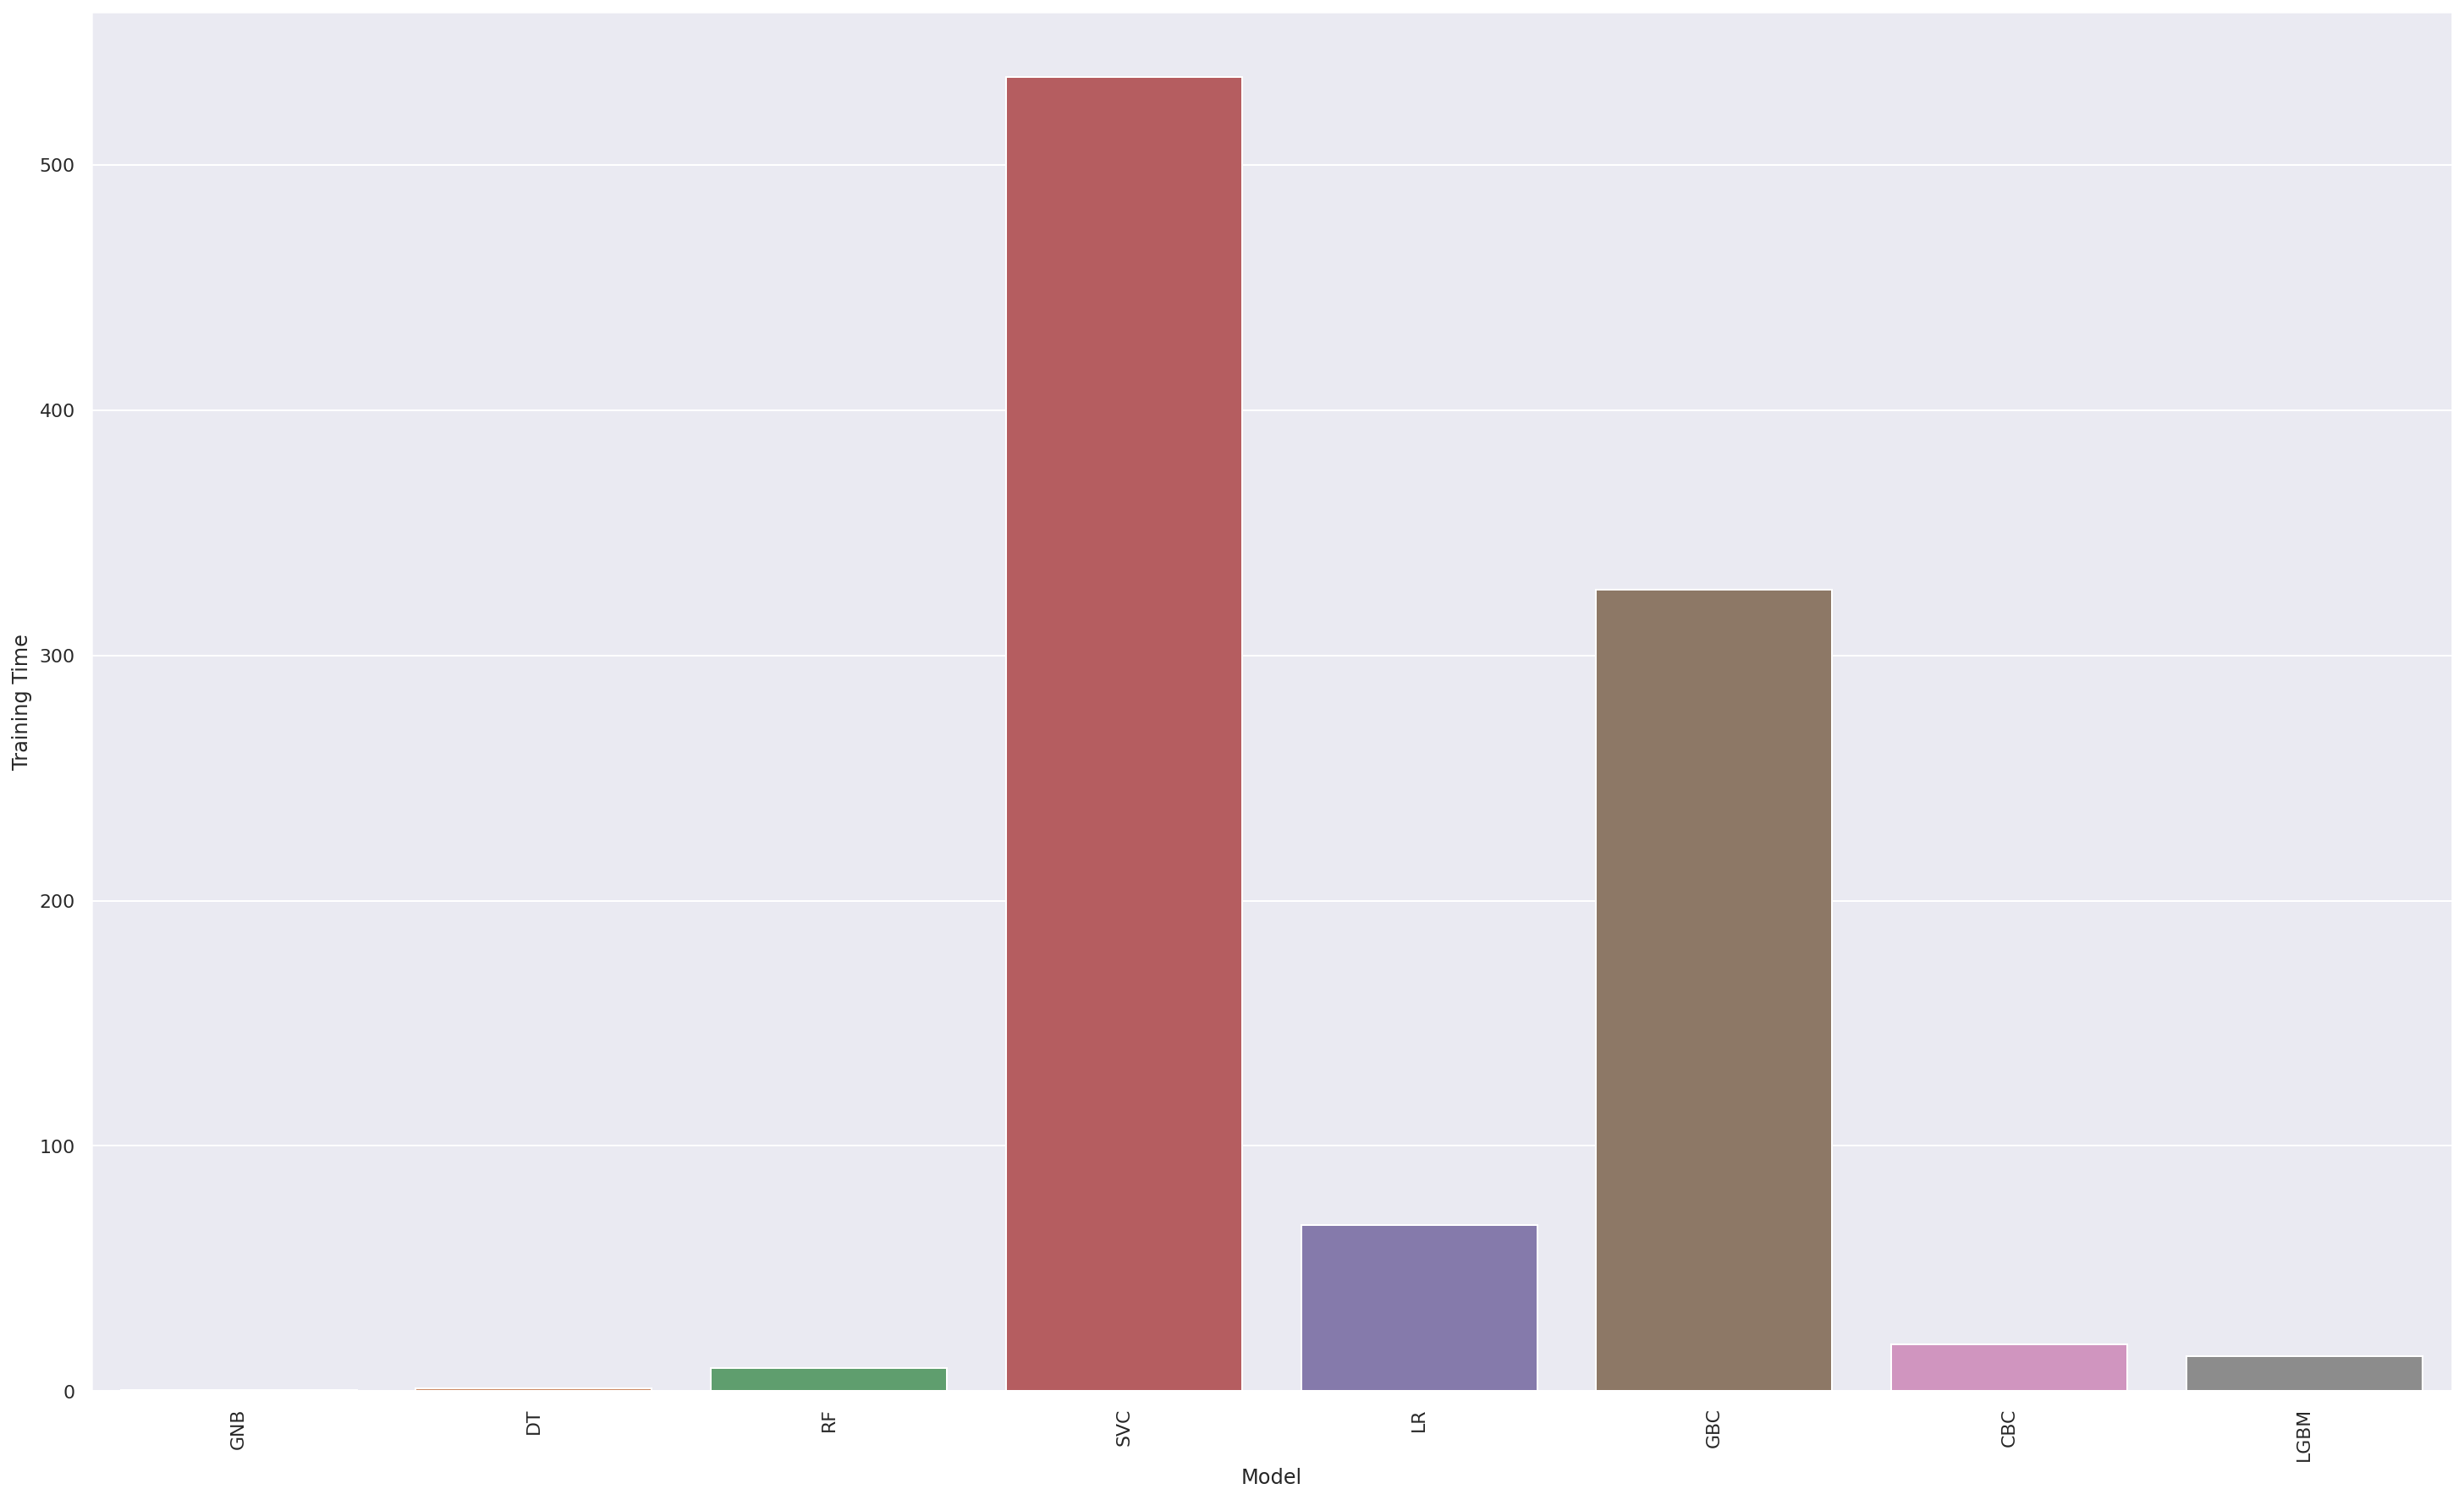

In [69]:
names = ['GNB', 'DT', 'RF', 'SVC', 'LR', 'GBC', 'CBC', 'LGBM']
values = [0.59927, 1.1712, 9.3125, 535.61, 67.770, 326.85, 19.170, 14.214]

plt.figure(figsize=(25,15))
sns.barplot(x=names, y=values)
plt.xticks(rotation= 90)
plt.xlabel('Model')
plt.ylabel('Training Time')
plt.show()

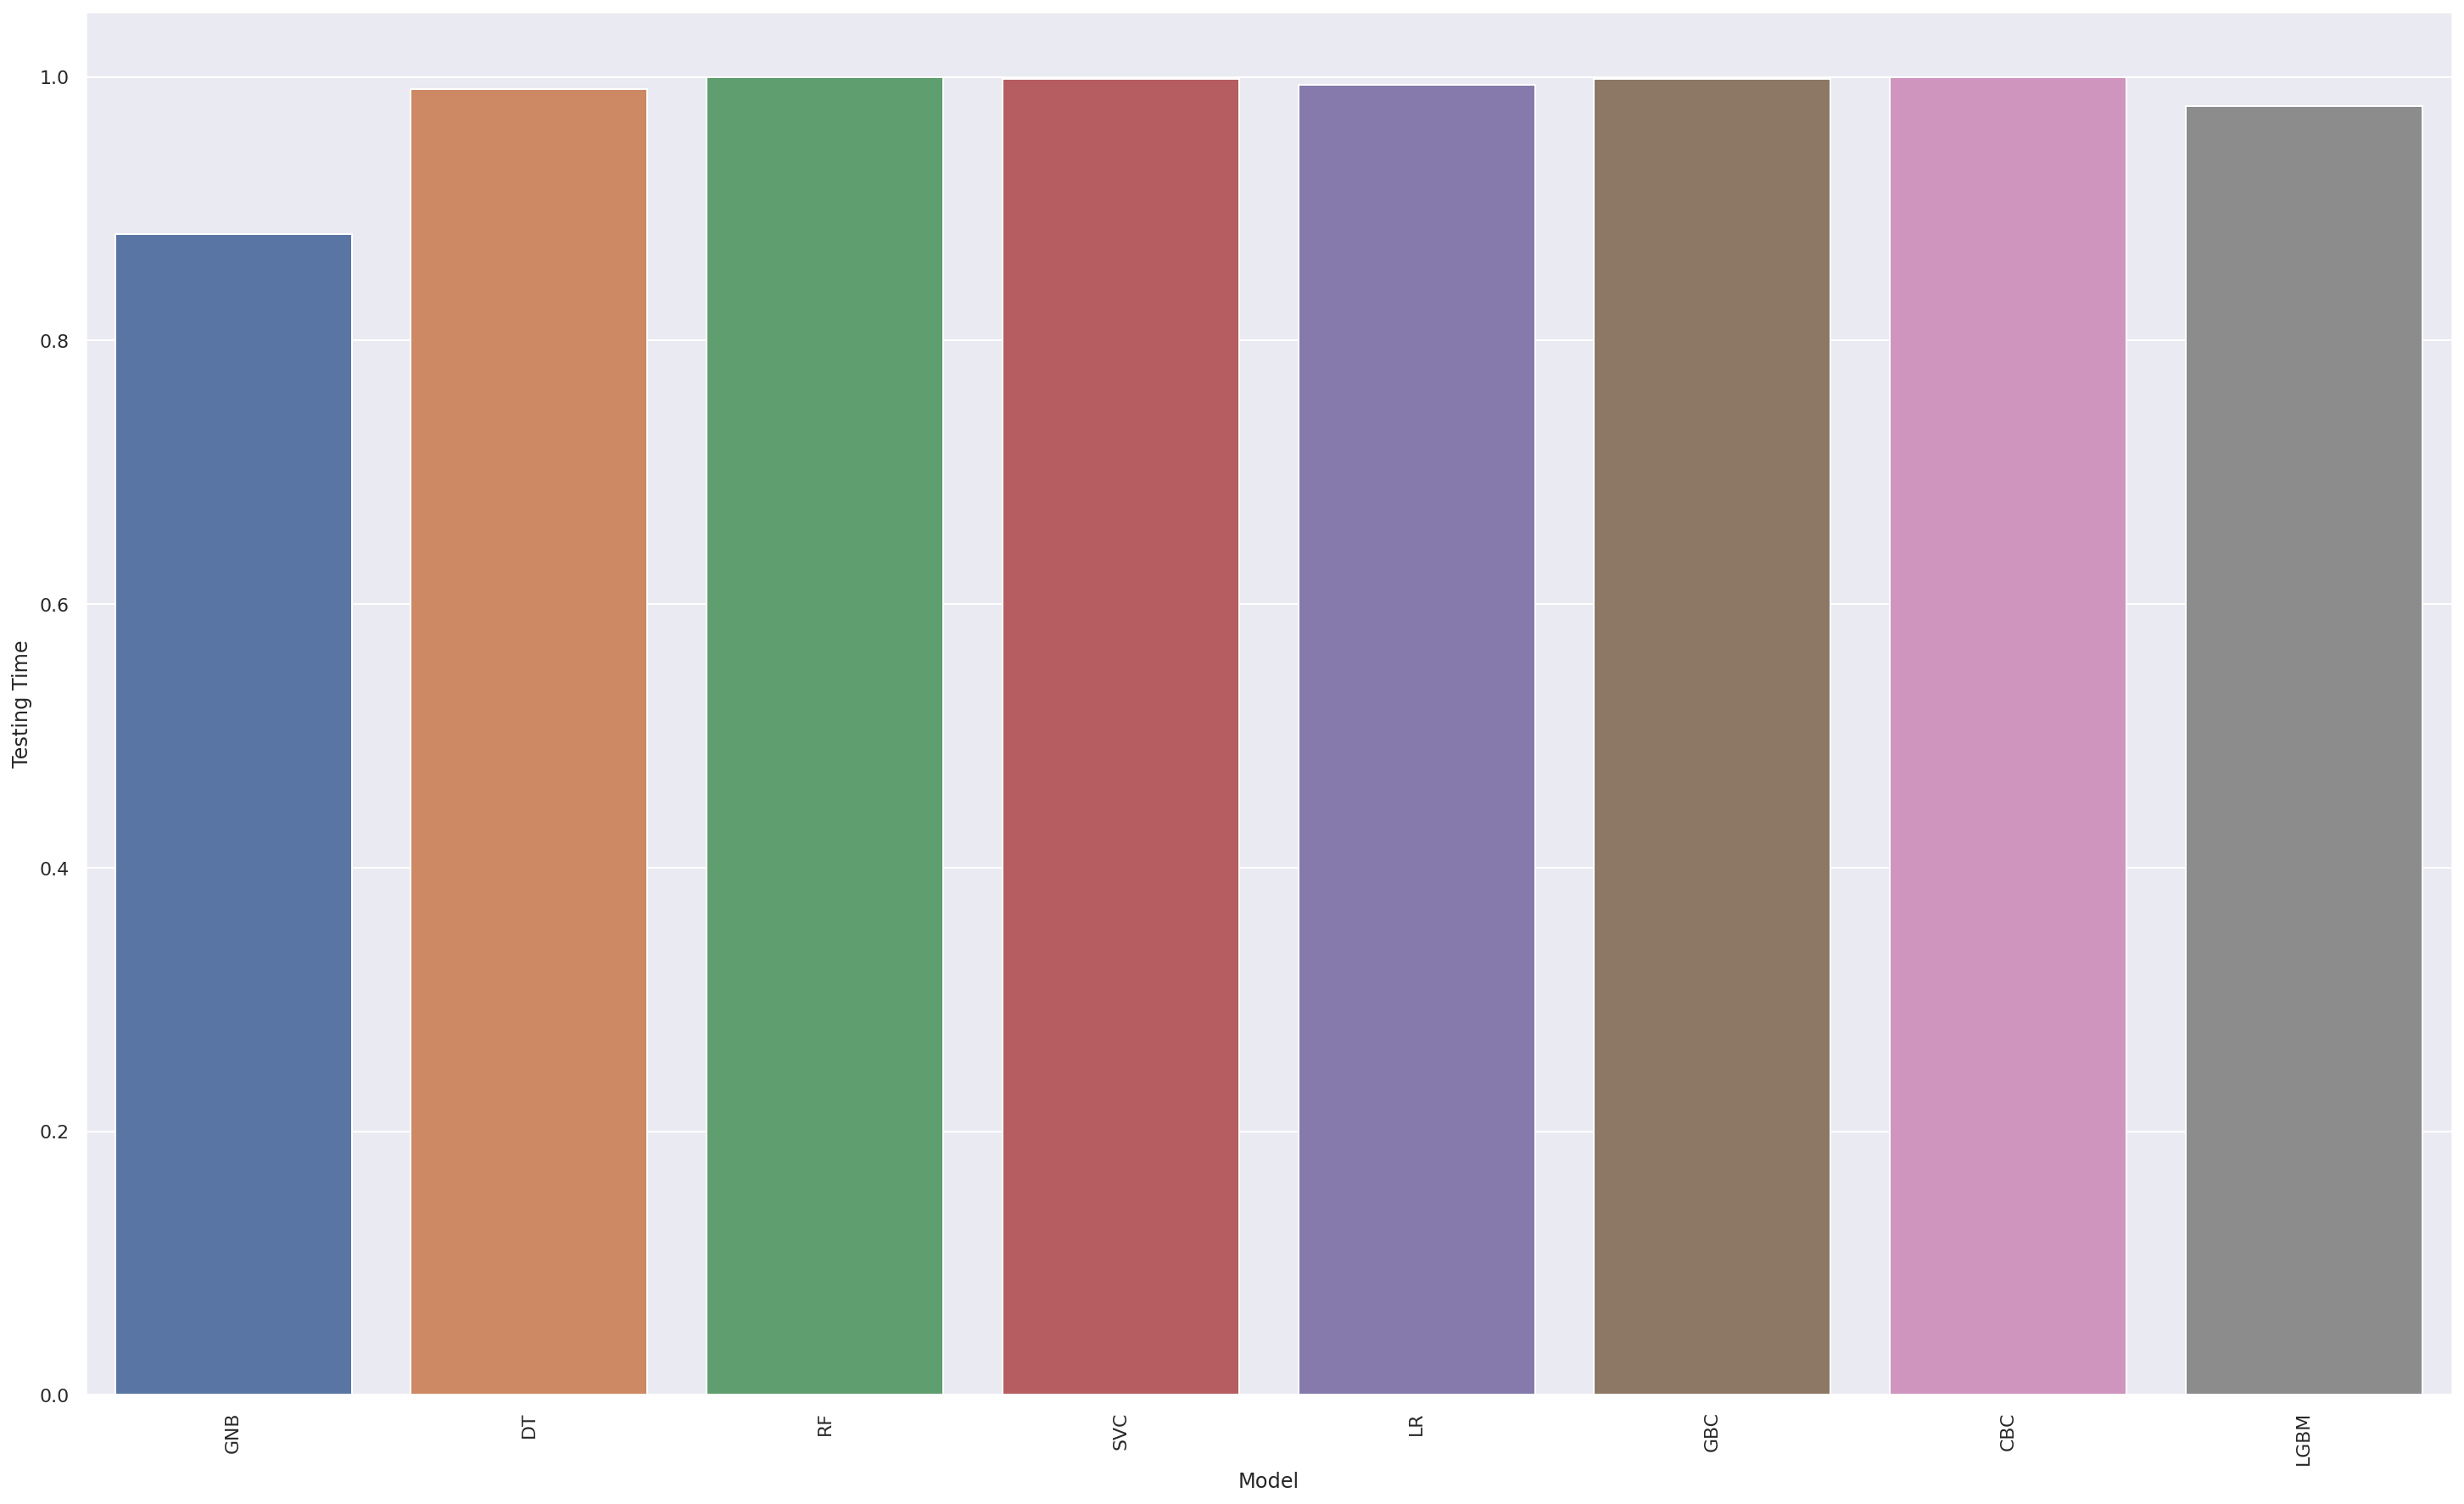

In [70]:
names = ['GNB', 'DT', 'RF', 'SVC', 'LR', 'GBC', 'CBC', 'LGBM']
values = [0.8810, 0.99054, 0.9996, 0.9987, 0.9941, 0.9988, 0.9995, 0.9780]

plt.figure(figsize=(25,15))
sns.barplot(x=names, y=values)
plt.xticks(rotation= 90)
plt.xlabel('Model')
plt.ylabel('Testing Time')
plt.show()